# Statistics and Probability (20592) - Final Project - Group 11 - Jan 11th, 2025

### Marie Cieslar, Marta Laskowska, Javiera Rubio, Gaia Iori

<font color='blue'>Requirements: for the notebook to run smoothly, the dataset "housing.csv" must be in the same directory of this code.</font> \
<font color='red'>Warning: Make sure that all libraries are installed before running this notebook. A comprehensive list of all libraries required is included below. </font>

### Table of Content
1. Data Cleaning <br> 
<br>
    1.1 Handling Outliers and Missing Values <br>
    1.2 Other Data Cleaning <br>
    <br>
2. Explotatory Data Analysis (EDA)
3. Feature Engineering
4. Linear Regression Model
5. Predictive Model


## Libraries
List of requirements:

- pandas
- numpy
- seaborn
- matplotlib
- scikit-learn
- scipy
- contextily
- statsmodels
- geopandas

In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_squared_error
from scipy.stats import pearsonr, norm, ttest_ind
import contextily as ctx
from matplotlib import gridspec
from sklearn.linear_model import LinearRegression
from shapely.geometry import Point
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import f_oneway, chi2_contingency, chi2,  f_oneway
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
pd.set_option('display.max_columns', None)
import geopandas as gpd


## 1. Data Cleaning
### 1.1 Handling Outliers and Missing Values 

In [247]:
# Load dataset
housing_data = pd.read_csv("housing.csv")

# Visualize the dataset
housing_data.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
1  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
2  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   
3  4/03/2017       2.5    3067.0       3.0       2.0  1.0      94.0   
4  4/06/2016       2.5    3067.0       3.0       1.0  2.0     120.0   

   BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN       Yarra   -37.7996    144.9984   
1          79.0     1900.0       Yarra   -37.8079    144.9934   
2         150.0     1900.0       Yarra   -37.8093    144.9944   
3           NaN        NaN       Yarra   -37.7969    144.9969   
4         142.0     2014.0       Yarra   -37.8072    144.9941   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

In [248]:
# Check length of the dataset
len(housing_data)

13580

### Data types

In [249]:
housing_data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [250]:
# Change columns to appropriate data types
housing_data['Date'] = pd.to_datetime(housing_data['Date'], format='%d/%m/%Y', errors='coerce')
housing_data['YearBuilt'] = pd.to_numeric(housing_data['YearBuilt'], errors='coerce').astype('Int64')
housing_data['Postcode'] = pd.to_numeric(housing_data['Postcode'], errors='coerce').astype('Int64')
housing_data['Bedroom2'] = pd.to_numeric(housing_data['Bedroom2'], errors='coerce').astype('Int64')
housing_data['Bathroom'] = pd.to_numeric(housing_data['Bathroom'], errors='coerce').astype('Int64')
housing_data['Car'] = pd.to_numeric(housing_data['Car'], errors='coerce').astype('Int64')
housing_data['Propertycount'] = pd.to_numeric(housing_data['Propertycount'], errors='coerce').astype('Int64')

### Detection of columns with missing data

In [251]:
missing_columns = housing_data.columns[housing_data.isnull().any()]
missing_columns_list = missing_columns.tolist()
missing_columns_list

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']

### Building Area - cleaning

In [252]:
# Check for entries where 'BuildingArea' is 0
errors_area = housing_data[housing_data['BuildingArea']==0]
errors_area.head()

Suburb            Address  Rooms Type      Price Method  \
4344   North Melbourne       19 Shands La      2    t   841000.0      S   
12226     Balwyn North      14 Wanbrow Av      5    h  1950000.0      S   
12249         Bundoora      22 Moreton Cr      3    h   814000.0      S   
12395    Roxburgh Park     16 Sandover Dr      4    h   570000.0      S   
12412        Thornbury  19/337 Station St      3    t   900000.0     VB   

      SellerG       Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
4344   Jellis 2017-03-04       2.3      3051         2         1    1   
12226      RT 2017-09-03       9.7      3104         5         3    2   
12249   Barry 2017-09-03      12.1      3083         3         1    2   
12395   Raine 2017-09-03      20.6      3064         4         2    2   
12412  Jellis 2017-09-03       7.0      3071         3         2    2   

       Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
4344      215.0           0.0       2000   Melbourne  -37.79530   144.94370   
12226     743.0           0.0       1949         NaN  -37.80235   145.09311   
12249     542.0           0.0       1970         NaN  -37.70861   145.05691   
12395     504.0           0.0       2000         NaN  -37.61419   144.93448   
12412     120.0           0.0       2000         NaN  -37.76343   145.02096   

                  Regionname  Propertycount  
4344   Northern Metropolitan           6821  
12226  Southern Metropolitan           7809  
12249  Northern Metropolitan          10175  
12395  Northern Metropolitan           5833  
12412  Northern Metropolitan           8870

In [253]:
len(errors_area)

17

In [254]:
housing_data = housing_data[housing_data['BuildingArea'] != 0]

### Detection of Outliers

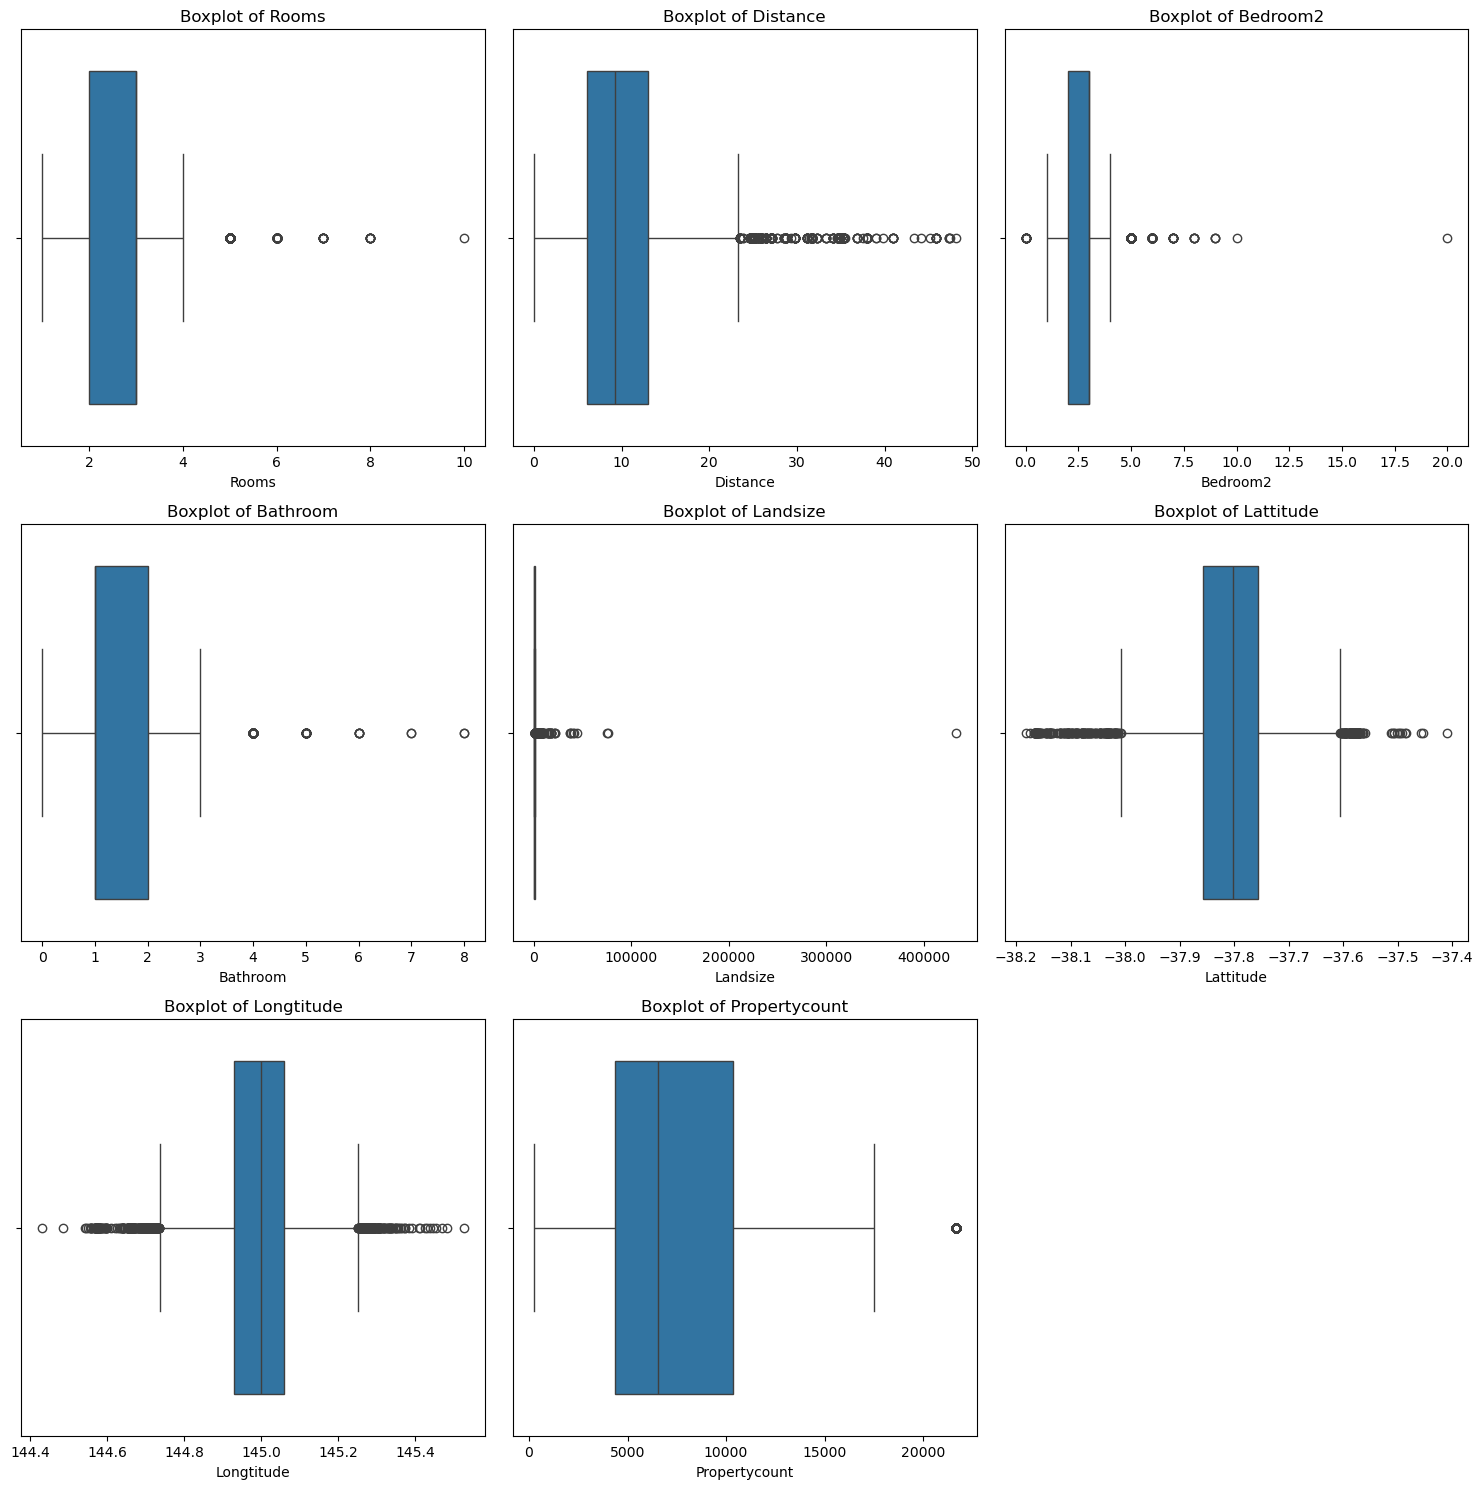

In [255]:
columns_to_plot = [
    column for column in housing_data.select_dtypes(include=['float64', 'int64']).columns
    if column not in ['Price', 'Postcode', 'Car', 'BuildingArea', 'YearBuilt', 'Land_price_per_m2', 'Building_and_land_price_per_m2', 'YearSold']
]

# Define the grid size
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Loop through columns and plot
for idx, column in enumerate(columns_to_plot):
    sns.boxplot(data=housing_data, x=column, ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {column}')

# Hide any unused axes
for ax in axes[len(columns_to_plot):]:
    ax.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

#### Car

In [256]:
# Create a data frame without NaN values in the 'Car' column
car_notna = housing_data[housing_data['Car'].notna()]

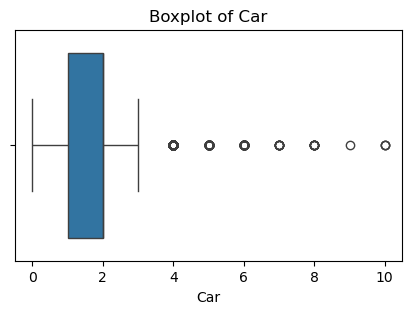

In [257]:
# Boxplot of 'Car' column (without NaN values)
plt.figure(figsize=(5, 3))
sns.boxplot(data=car_notna, x='Car')
plt.title(f'Boxplot of Car')
plt.show()

#### YearBuilt

In [258]:
# Create a data frame without NaN values in the 'YearBuilt' column
year_built_notna = housing_data[housing_data['BuildingArea'].notna()]

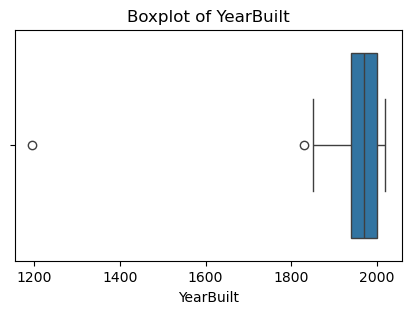

In [259]:
# Boxplot of 'YearBuilt' column (without NaN values)
plt.figure(figsize=(5, 3))
sns.boxplot(data=year_built_notna, x='YearBuilt')
plt.title(f'Boxplot of YearBuilt')
plt.show()

### Univariate Analysis

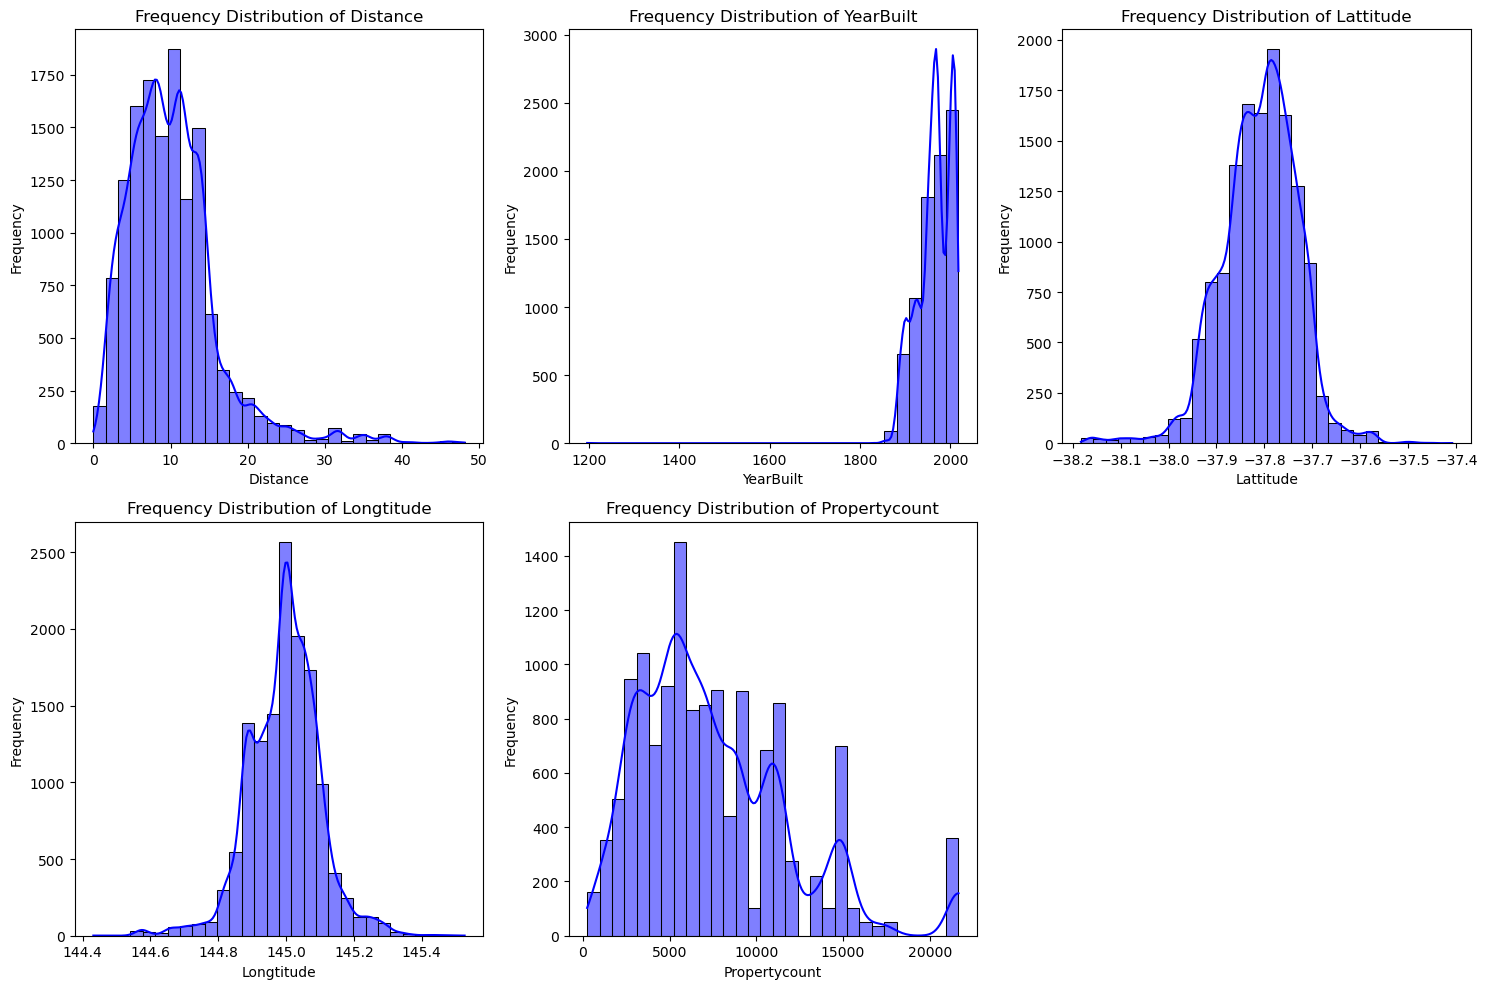

In [260]:
columns_to_plot = ['Distance', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

# Define the grid size
n_cols = 3  # Number of plots per row
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Loop through columns and plot
for idx, column in enumerate(columns_to_plot):
    sns.histplot(data=housing_data, x=column, kde=True, bins=30, color='blue', ax=axes[idx])
    axes[idx].set_title(f'Frequency Distribution of {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')

# Hide any unused axes
for ax in axes[len(columns_to_plot):]:
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

### Bivariate Analysis

Price vs. Type of property

/var/folders/b0/3lm1b6yx0z52q8tv2nvq6qc40000gn/T/ipykernel_74497/881301934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Type', y='Price', palette='viridis')


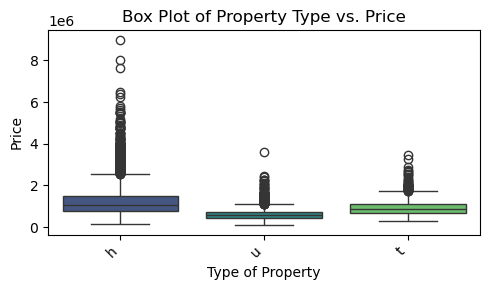

In [261]:
# Create a boxplot of 'Type' vs. 'Price'
plt.figure(figsize=(5, 3))
sns.boxplot(data=housing_data, x='Type', y='Price', palette='viridis')
plt.title('Box Plot of Property Type vs. Price')
plt.xlabel('Type of Property')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Method vs. Price

/var/folders/b0/3lm1b6yx0z52q8tv2nvq6qc40000gn/T/ipykernel_74497/3217142432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Method', y='Price', palette='viridis')


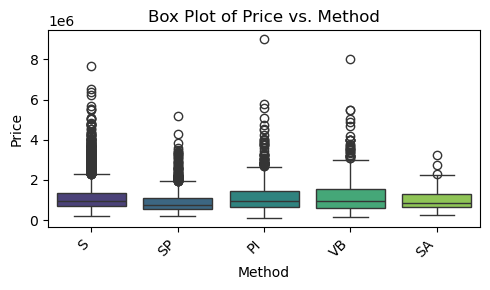

In [262]:
# Create a boxplot of 'Method' vs. 'Price'
plt.figure(figsize=(5, 3))
sns.boxplot(data=housing_data, x='Method', y='Price', palette='viridis')
plt.title('Box Plot of Price vs. Method')
plt.xlabel('Method')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Region Name vs. Price

/var/folders/b0/3lm1b6yx0z52q8tv2nvq6qc40000gn/T/ipykernel_74497/3776308083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Regionname', y='Price', palette='viridis')


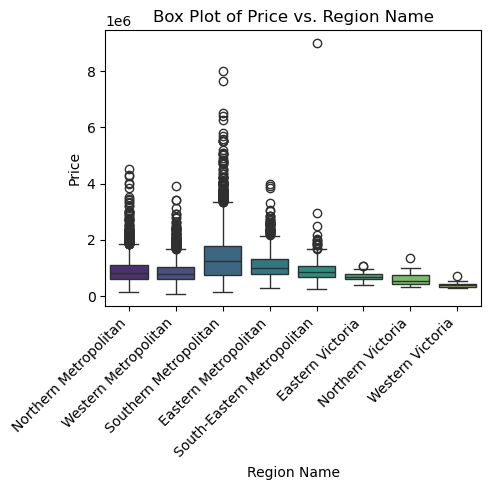

In [263]:
# Create a boxplot of 'Regionname' vs. 'Price'
plt.figure(figsize=(5, 5))
sns.boxplot(data=housing_data, x='Regionname', y='Price', palette='viridis')
plt.title('Box Plot of Price vs. Region Name')
plt.xlabel('Region Name')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Bedroom2 vs Price

/var/folders/b0/3lm1b6yx0z52q8tv2nvq6qc40000gn/T/ipykernel_74497/1495222477.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Bedroom2', y='Price', palette='viridis')


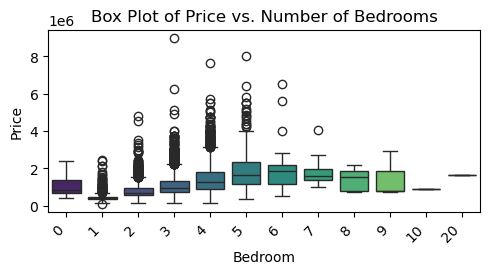

In [264]:
# Create a boxplot of 'CouncilArea' vs. 'Price'
plt.figure(figsize=(5, 3))
sns.boxplot(data=housing_data, x='Bedroom2', y='Price', palette='viridis')
plt.title('Box Plot of Price vs. Number of Bedrooms')
plt.xlabel('Bedroom')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Bathrooms vs. Price

/var/folders/b0/3lm1b6yx0z52q8tv2nvq6qc40000gn/T/ipykernel_74497/1684374100.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Bathroom', y='Price', palette='viridis')


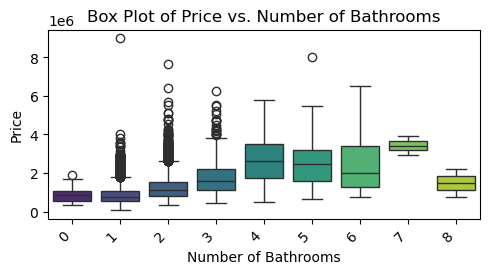

In [265]:
# Boxplot of 'Bathroom' vs. 'Price'
plt.figure(figsize=(5, 3))
sns.boxplot(data=housing_data, x='Bathroom', y='Price', palette='viridis')
plt.title('Box Plot of Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

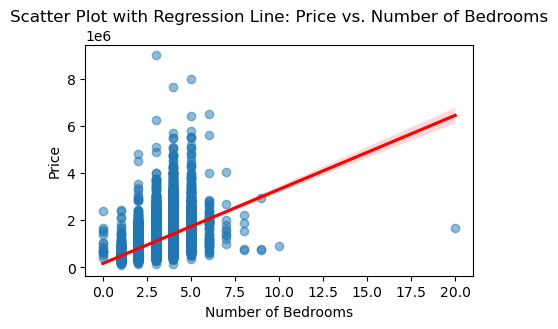

In [266]:
plt.figure(figsize=(5, 3))
sns.regplot(data=housing_data, x=housing_data['Bedroom2'].astype(float), y='Price', scatter_kws={'alpha':0.5}, line_kws={'color': "red"})
plt.title('Scatter Plot with Regression Line: Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

Price vs Car Space

/var/folders/b0/3lm1b6yx0z52q8tv2nvq6qc40000gn/T/ipykernel_74497/3234245628.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data.dropna(), x='Car', y='Price', palette='viridis')


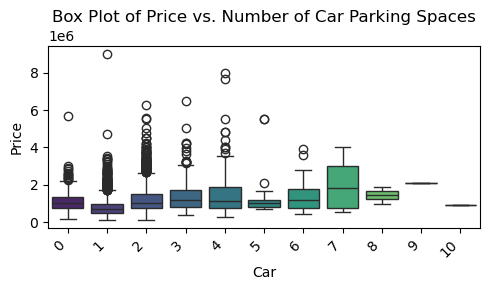

In [267]:
# Create a boxplot of 'Car' vs. 'Price'
plt.figure(figsize=(5, 3))
sns.boxplot(data=housing_data.dropna(), x='Car', y='Price', palette='viridis')
plt.title('Box Plot of Price vs. Number of Car Parking Spaces')
plt.xlabel('Car')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Price vs Landsize

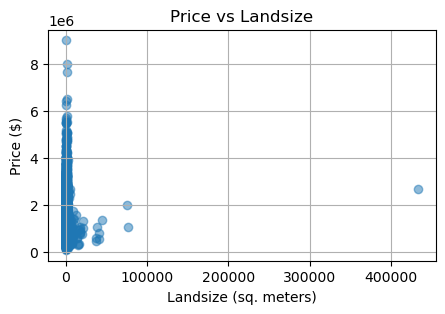

In [268]:
plt.figure(figsize=(5, 3))
plt.scatter(housing_data['Landsize'], housing_data['Price'], alpha=0.5)
plt.title("Price vs Landsize")
plt.xlabel("Landsize (sq. meters)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

Price vs log(Landsize)

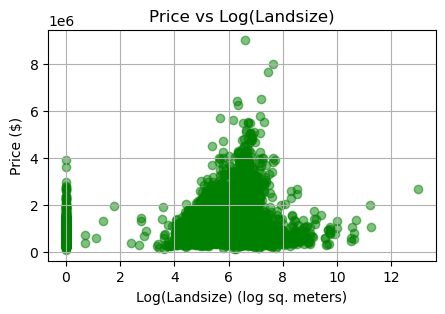

In [269]:
plt.figure(figsize=(5, 3))
plt.scatter(np.log1p(housing_data['Landsize']), housing_data['Price'], alpha=0.5, color='green')
plt.title("Price vs Log(Landsize)")
plt.xlabel("Log(Landsize) (log sq. meters)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

Price vs Distance 

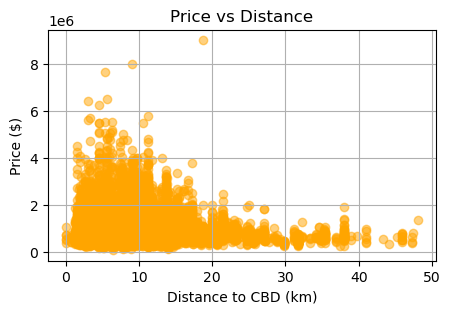

In [270]:
plt.figure(figsize=(5, 3))
plt.scatter(housing_data['Distance'], housing_data['Price'], alpha=0.5, color='orange')
plt.title("Price vs Distance")
plt.xlabel("Distance to CBD (km)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

Price vs log(Distance)

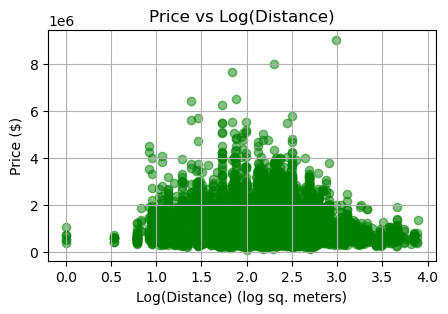

In [271]:
plt.figure(figsize=(5, 3))
plt.scatter(np.log1p(housing_data['Distance']), housing_data['Price'], alpha=0.5, color='green')
plt.title("Price vs Log(Distance)")
plt.xlabel("Log(Distance) (log sq. meters)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

Price vs Propertycount

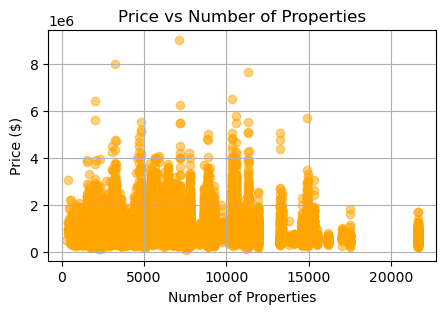

In [272]:
plt.figure(figsize=(5, 3))
plt.scatter(housing_data['Propertycount'], housing_data['Price'], alpha=0.5, color='orange')
plt.title("Price vs Number of Properties")
plt.xlabel("Number of Properties")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

Price vs log(Propertycount)

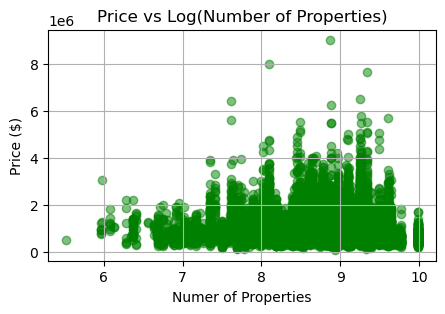

In [273]:
plt.figure(figsize=(5, 3))
plt.scatter(np.log1p(housing_data['Propertycount']), housing_data['Price'], alpha=0.5, color='green')
plt.title("Price vs Log(Number of Properties)")
plt.xlabel("Numer of Properties")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

Price vs Building Area

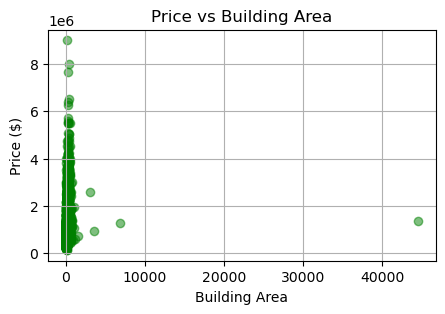

In [274]:
plt.figure(figsize=(5, 3))
plt.scatter(housing_data['BuildingArea'], housing_data['Price'], alpha=0.5, color='green')
plt.title("Price vs Building Area")
plt.xlabel("Building Area")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

Building Area vs Region Name

/var/folders/b0/3lm1b6yx0z52q8tv2nvq6qc40000gn/T/ipykernel_74497/990019981.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


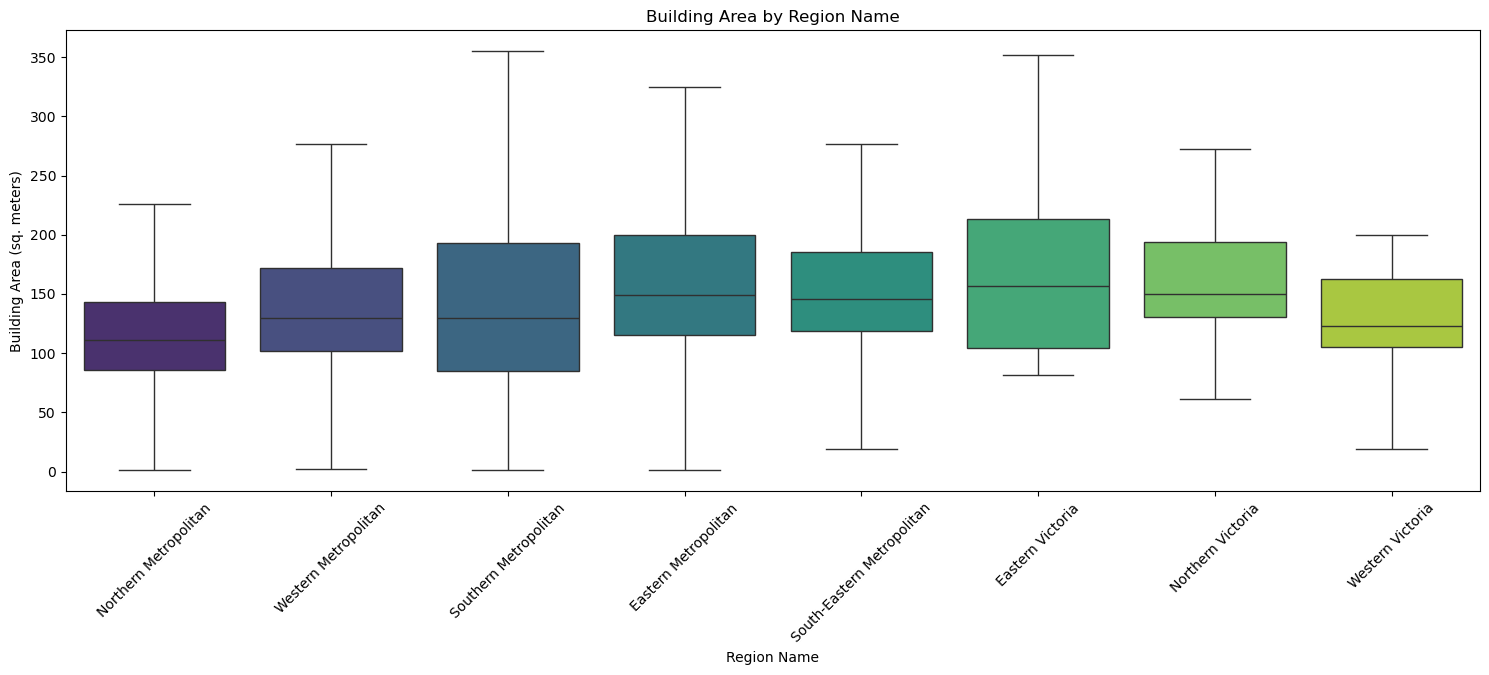

In [275]:
plt.figure(figsize=(15, 7))
sns.boxplot(
    x='Regionname', 
    y='BuildingArea', 
    data=housing_data, 
    palette='viridis', 
    showfliers=False
)
plt.title("Building Area by Region Name")
plt.suptitle("")  # Remove the automatic subplot title
plt.xlabel("Region Name")
plt.ylabel("Building Area (sq. meters)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average Housing Prices by Region - **before data imputation**

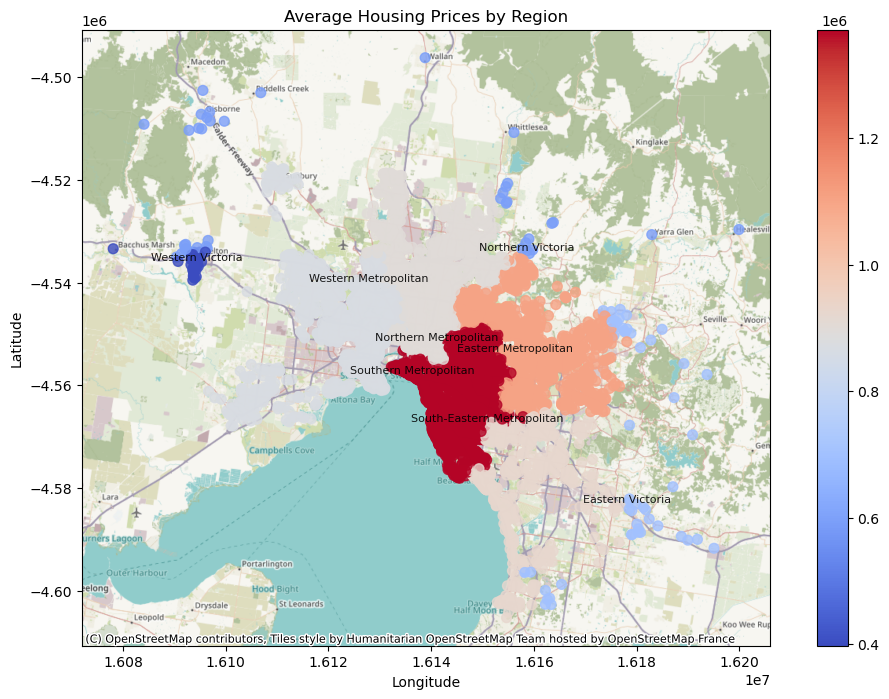

In [276]:
# Step 1: Drop rows with missing values for specified columns
filtered_data = housing_data.dropna(subset=['Price', 'Lattitude', 'Longtitude', 'Regionname'])

# Step 2: Calculate the average price per region
average_price_per_region = housing_data.groupby('Regionname')['Price'].mean().reset_index()

# Step 3: Merge the average prices back to include spatial data
region_geo = filtered_data[['Regionname', 'Lattitude', 'Longtitude']].drop_duplicates()
merged_data = region_geo.merge(average_price_per_region, on='Regionname')

# Step 4: Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    merged_data,
    geometry=gpd.points_from_xy(merged_data['Longtitude'], merged_data['Lattitude']),
    crs="EPSG:4326"
)

# Ensure the GeoDataFrame has a CRS
gdf.set_crs(epsg=4326, inplace=True)
gdf = gdf.to_crs(epsg=3857)

# Step 5: Plot the data on a basemap
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, column='Price', cmap='coolwarm', legend=True, markersize=50, alpha=0.8)

# Add a single label for each region by dropping duplicate labels based on 'Regionname'
unique_labels = gdf.drop_duplicates(subset='Regionname')
for x, y, label in zip(unique_labels.geometry.x, unique_labels.geometry.y, unique_labels['Regionname']):
    ax.text(x, y, label, fontsize=8, ha='center', color='black', alpha=0.9)

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs)
plt.title("Average Housing Prices by Region")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Filtering outliers using upper and lower bound

In [277]:
def finding_outliers(data, column_name):
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers

# 'LandSize' outliers
outliers_landsize = finding_outliers(housing_data, 'Landsize')
print(outliers_landsize['Landsize'].sort_values(ascending=False), '\n\n sum of outliers:', outliers_landsize['Landsize'].count())
print('\n\n')

# 'YearBuilt' outliers
outliers_yearbuilt = finding_outliers(housing_data, 'YearBuilt')
print(outliers_yearbuilt['YearBuilt'].sort_values(ascending=False), '\n\n sum of outliers:', outliers_yearbuilt['YearBuilt'].count())

11020    433014.0
10504     76000.0
687       75100.0
13245     44500.0
5194      41400.0
           ...   
11302      1388.0
4028       1388.0
9976       1382.0
5616       1369.0
656        1364.0
Name: Landsize, Length: 368, dtype: float64 

 sum of outliers: 368



2554    1850
4843    1850
5405    1850
5860    1850
2079    1830
9968    1196
Name: YearBuilt, dtype: Int64 

 sum of outliers: 6


In [278]:
# Identify the indices of the outliers
outliers_indices = set(outliers_landsize.index).union(set(outliers_yearbuilt.index))

# Remove the outliers from the original dataset
housing_data_no_outliers = housing_data.drop(index=outliers_indices).reset_index(drop=True)

# Display the cleaned dataset
housing_data_no_outliers.head()

housing_data = housing_data_no_outliers

## Handling Missing Data

In [279]:
print("\nPre-Cleaning Missing Data:")
missing_data = housing_data.isnull().sum()
missing_percentage = (missing_data / len(housing_data)) * 100
missing_percentage = missing_percentage.round(2)
missing_report = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})
missing_report[missing_report['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)



Pre-Cleaning Missing Data:


Missing Count  Missing Percentage
BuildingArea           6258               47.45
YearBuilt              5232               39.67
CouncilArea            1317                9.98
Car                      59                0.45

### Identifying Patterns of Missingness

#### Patterns of Missingness
**MCAR (Missing Completely at Random)** <br>
Missing values are entirely random, unrelated to other variables or the missing variable itself.

**MAR (Missing at Random)** <br>
Missingness is related to other observed variables but not the missing variable.

**MNAR (Missing Not at Random)** <br>
Missingness is related to the value of the variable itself.

#### Missing Data Visulization

**Heatmap of Missing Data** <br>

The heatmap of missing data shows that missing values are scattered across the features Car, BuildingArea, YearBuilt, and CouncilArea, with some clustering in specific rows, indicating potential patterns in missingness.


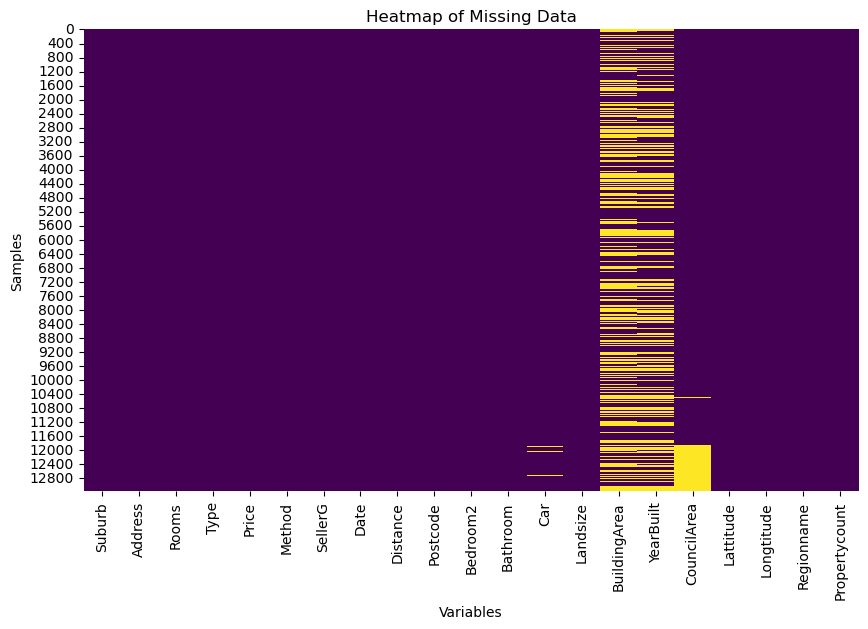

In [280]:
# Heatmap of missing data
plt.figure(figsize=(10, 6))
sns.heatmap(housing_data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Data")
plt.xlabel("Variables")
plt.ylabel("Samples")
plt.show()

**Correlation Matrix of Missingness between Variables** <br>

The correlation matrix shows a strong positive correlation (0.77) between the missingness of 'BuildingArea' and 'YearBuilt', suggesting that missing values in these two variables are likely related, potentially due to shared data collection or record-keeping processes. Other variables, such as 'Car' and 'CouncilArea', show weak or no correlations, indicating independent missingness patterns.

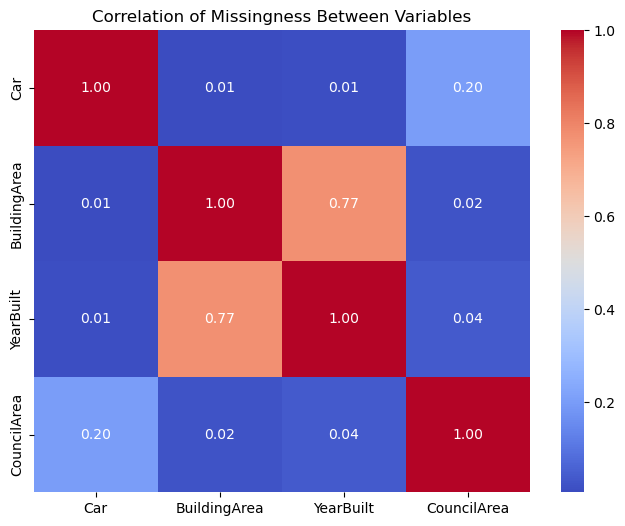

In [281]:
# Correlation Matrix of between Variables with missing data
def plot_missingness_correlation(data, features_with_missingness):
    missing_corr = data[features_with_missingness].isnull().astype(int).corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(missing_corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation of Missingness Between Variables")
    plt.show()

features_with_missingness = ["Car", "BuildingArea", "YearBuilt", "CouncilArea"]
plot_missingness_correlation(housing_data, features_with_missingness)


Correlations between missing values (e.g., 0.77 correlation between BuildingArea and YearBuilt) suggest a MAR pattern. Missing 'BuildingArea' might be explained by 'YearBuilt' (e.g., older properties may lack recorded building areas).

**Statistical Tests to check MAR assumption** <br>

There are multiple ways to test our assumptions on the type of missingness.

A very common one being Little's MCAR test. However, for large data sets, such as the one at hand, it is unsuitable due to computational complexity and the exponential growth of unique missingness patterns, making the calculations impractical and prone to errors. The high degree of freedom in the large dataset at hand leads to a lack of sensitivty of the chi-square test, resulting in a misleadingly high p-value. For large datasets, alternative methods such as subgroup analysis or visualizing missingness patterns are often more reliable. We first perform a t-test for difference in 'Price' between missing and non-missing values in 'Car', 'CouncilArea', 'YearBuilt', 'BuildingArea'.

**T-test**


In [282]:
def compute_t_test(data, variable, target='Price'):
    # Split data into groups based on missingness of the variable
    missing_rows = data[data[variable].isna()]
    non_missing_rows = data[data[variable].notna()]
    
    # Perform t-test for the target variable
    t_stat, p_value = ttest_ind(
        missing_rows[target].dropna(),
        non_missing_rows[target].dropna(),
        equal_var=False  # Welch's t-test for unequal variances
    )
    return t_stat, p_value

# Variables to test
variables_to_test = ['Car', 'CouncilArea', 'YearBuilt', 'BuildingArea']

# Compute t-tests for each variable
t_test_results = {var: compute_t_test(housing_data, var) for var in variables_to_test}

# Display the results
t_test_results


{'Car': (2.9576185476894783, 0.004456396890601594),
 'CouncilArea': (6.281149918967278, 4.3082644903468333e-10),
 'YearBuilt': (2.5789670313771302, 0.009921522822814381),
 'BuildingArea': (-0.374776833151398, 0.7078324713259266)}

'Car', 'CouncilArea', and 'YearBuilt' show significant differences in 'Price' between rows with and without missing values. BuildingArea does not show a significant difference.

**Logistic regression** with missingness in 'YearBuilt' as the dependent variable and other observed features as predictors.

In [283]:
def run_logistic_regression(data, variable, predictors):
    # Create the dependent variable: missingness indicator for the variable
    data[f'{variable}_missing'] = data[variable].isna().astype(int)
    
    # Filter rows with complete data for predictors
    filtered_data = data.dropna(subset=predictors)
    
    # Define predictors and dependent variable
    X = filtered_data[predictors]
    X = sm.add_constant(X)  # Add intercept
    y = filtered_data[f'{variable}_missing']
    
    # Fit logistic regression model
    logit_model = sm.Logit(y, X).fit()
    return logit_model.summary()

# Predictors for the regression
predictors = ['Price', 'Rooms', 'Distance', 'Landsize', 'BuildingArea']

# Run logistic regression for each variable
variables_to_run = ['Car', 'CouncilArea', 'YearBuilt']
results_logistic = {}

for variable in variables_to_run:
    print(f"\nLogistic Regression for Missingness in {variable}:\n")
    results_logistic[variable] = run_logistic_regression(housing_data, variable, predictors)
    print(results_logistic[variable])



Logistic Regression for Missingness in Car:

Optimization terminated successfully.
         Current function value: 0.021157
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:            Car_missing   No. Observations:                 6932
Model:                          Logit   Df Residuals:                     6926
Method:                           MLE   Df Model:                            5
Date:                Sat, 11 Jan 2025   Pseudo R-squ.:                  0.1954
Time:                        21:54:24   Log-Likelihood:                -146.66
converged:                       True   LL-Null:                       -182.27
Covariance Type:            nonrobust   LLR p-value:                 5.720e-14
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.2935      0.611     -3.755      0.000 

The logistic regression results show that missingness in Car, CouncilArea, and YearBuilt is significantly associated with observed variables like Price, Distance, and Landsize. This suggests the data is likely missing at random (MAR), as the variation in missingness can be explained by these predictors.

**Chi-Square Tests for Independence** <br>

We will run a Chi-Square Tests for Independence to test if the missingness of 'BuildinArea' is independent of 'YearBuilt' as a correlation is suggested in the correlation matrix.

In [284]:
# Create missingness indicator for a variable
housing_data['BuildingArea_missing'] = housing_data['BuildingArea'].isnull().astype(int)

# Perform chi-square test against another observed variable
contingency_table = pd.crosstab(housing_data['BuildingArea_missing'], housing_data['YearBuilt'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Check the p-value
print("P-value:", p)

P-value: 4.831947462199855e-16


The p-value of 4.83e-16 is extremely small, indicating a highly significant result. This means that the missingness of 'BuildingArea' is not independent of 'YearBuilt'. This further confirms our assumption of the values for 'BuildingArea' being MAR.

In [285]:
# Drop missingness indicator columns
housing_data.drop(columns=['BuildingArea_missing', 'Car_missing', 'CouncilArea_missing', 'YearBuilt_missing'], inplace=True)


### Handling of Missing Values
Based on our prior analysis we will now continue to handle the missing values in our data set choosing a fitting approach for each of the four variables.


#### Car
From our preliminary analysis we conclude that 'Car' is MCAR. Due to the low proportion of missing values in the variable 'Car' we choose to drop all rows containing missing values.


In [286]:
# Handle missing values in 'Car'
housing_data = housing_data.dropna(subset=['Car'])


#### CouncilArea
We conclude that 'CouncilArea' is MAR. While imputation using observed variables would be possible, we still choose to drop the column wit the variable 'CouncilArea'. This is done as the Variable will not be needed for further anlysis, due to the availability of other variables that give similar insights relating to the location of the properties.

In [287]:
housing_data = housing_data.drop(columns=['CouncilArea'])

#### YearBuilt

Our analysis suggests that 'YearBuilt' is MAR. Thus, we perform more in-depth analysis on it's correlation with other variables to establish whether uisng Linear Regression or KNN is are viable imputation techniques.

In [288]:
# Encode non-numeric columns
encoded_housing_data = housing_data.copy()
non_numeric_columns = encoded_housing_data.select_dtypes(exclude=[np.number]).columns
label_encoders = {}

for col in non_numeric_columns:
    label_encoders[col] = LabelEncoder()
    encoded_housing_data[col] = label_encoders[col].fit_transform(encoded_housing_data[col].astype(str))

# Select numeric and encoded columns
numeric_and_encoded_columns = encoded_housing_data.select_dtypes(include=[np.number])

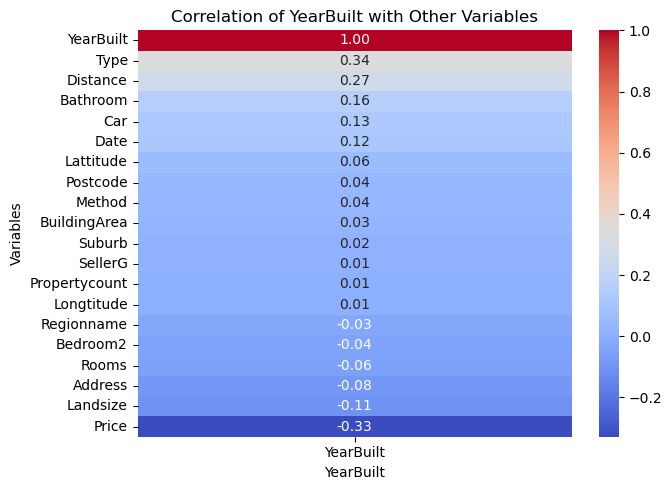

In [289]:
# Compute correlation matrix and visualize correlations with 'YearBuilt'
correlation_matrix_encoded = numeric_and_encoded_columns.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(
    correlation_matrix_encoded[['YearBuilt']].sort_values(by='YearBuilt', ascending=False),
    annot=True, cmap='coolwarm', cbar=True, fmt=".2f"
)
plt.title('Correlation of YearBuilt with Other Variables')
plt.xlabel('YearBuilt')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

As 'YearBuilt' does not correlate with any other variables over the threshold of 0.25 which would lead to impution with predictors that have a weak or no relationship with 'YearBuilt', and thus lead to values that are not meaningful or accurate. 

Hence, we proceed with other forms of imputation and check for variability across regions.

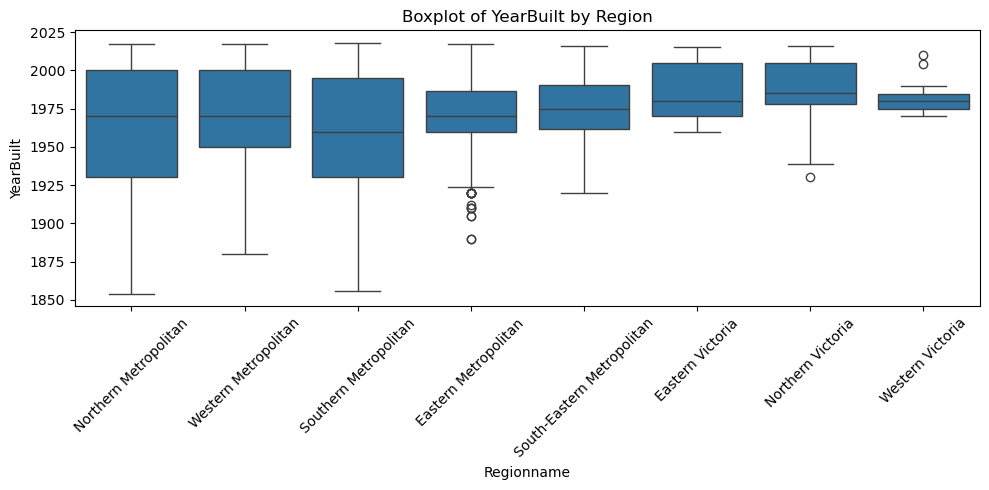

In [290]:
# Boxplot for YearBuilt by Region to check for variance between the different Regions
plt.figure(figsize=(10, 5))
sns.boxplot(x='Regionname', y='YearBuilt', data=housing_data)
plt.xticks(rotation=45)
plt.title('Boxplot of YearBuilt by Region')
plt.xlabel('Regionname')
plt.ylabel('YearBuilt')
plt.tight_layout()
plt.show()

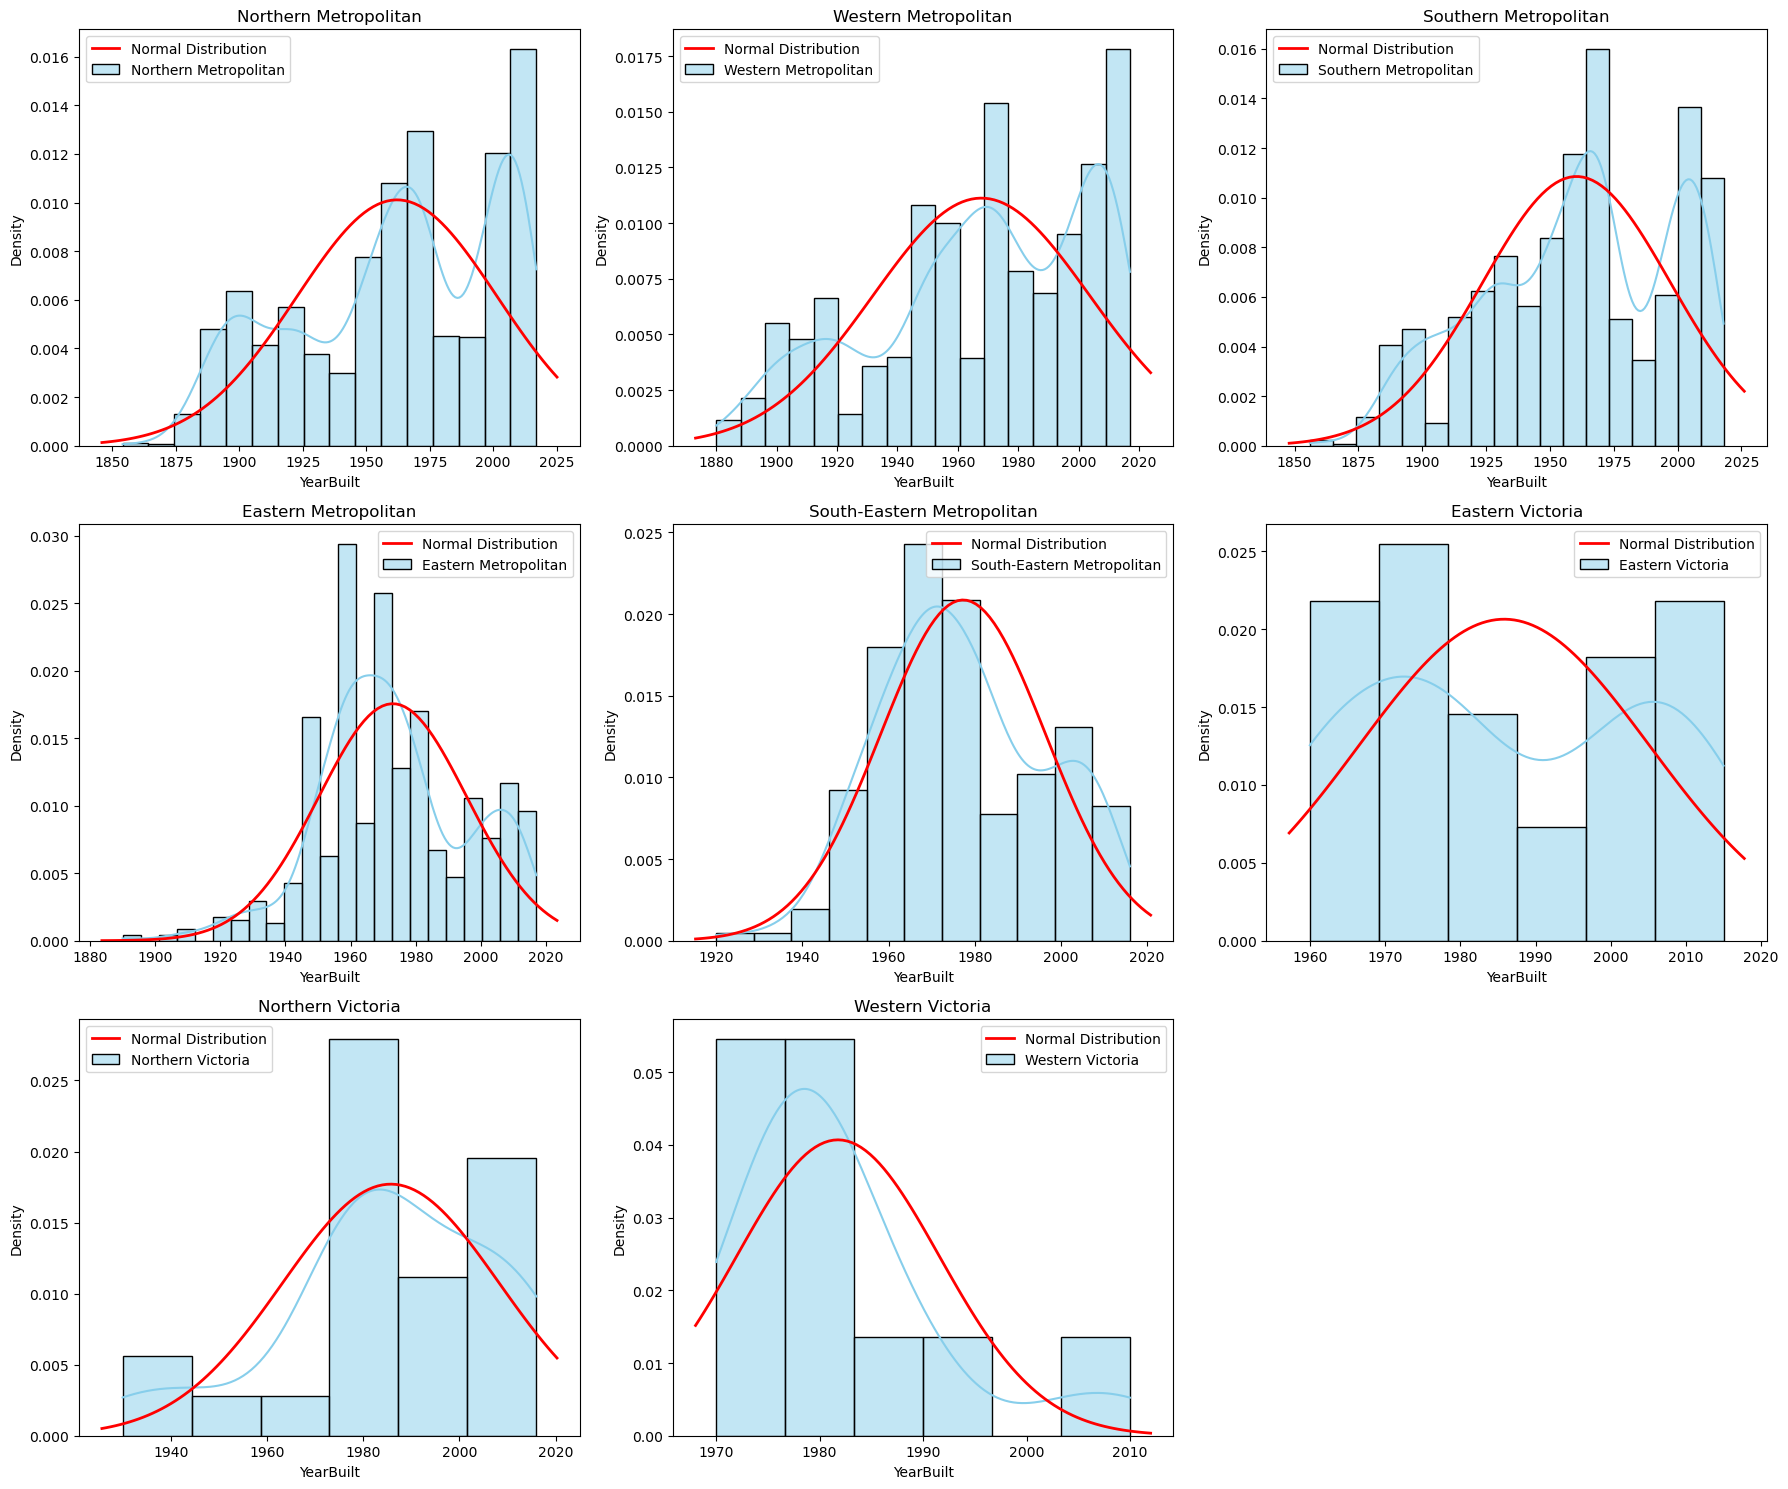

In [291]:
# Check if YearBuilt follows a Normal distirbution
# Group the data by 'Regionname' and prepare for subplots
regions = housing_data['Regionname'].unique()
num_regions = len(regions)

# Determine the number of rows and columns for subplots
rows = int(np.ceil(num_regions / 3))
cols = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()

for i, region in enumerate(regions):
    ax = axes[i]
    # Filter data for the specific region and drop missing YearBuilt values
    region_data = housing_data[housing_data['Regionname'] == region]['YearBuilt'].dropna()
    
    if region_data.empty:
        ax.set_title(f"{region} - No Data")
        ax.axis('off')
        continue

    # Plot histogram and normal distribution
    sns.histplot(region_data, kde=True, stat="density", color='skyblue', ax=ax, label=f"{region}")
    
    # Plot normal distribution
    mean = region_data.mean()
    std = region_data.std()
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    ax.plot(x, p, 'r', linewidth=2, label="Normal Distribution")
    ax.set_title(f"{region}")
    ax.legend()

# Remove empty subplots if regions are fewer than rows * cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



We can see from the plots that 'YearBuilt' does not follow a normal distribution within each region. Thus we can not impute 'YearBuilt' by drawing at random from a normal distribution. As variability within the variable is still important, we sample directly sample from the existing observed values in each region. This method ensures that the imputed values align with the actual distribution of 'YearBuilt' within each region, regardless of its shape.

In [292]:
def random_impute_by_region(data, region_col, yearbuilt_col):
    for region in data[region_col].unique():
        # Filter non-missing values of YearBuilt for the current region
        region_data = data[data[region_col] == region][yearbuilt_col].dropna()
        
        # Check if there are non-missing values to sample from
        if not region_data.empty:
            # Count the number of missing values in YearBuilt for the current region
            missing_count = data[(data[region_col] == region) & (data[yearbuilt_col].isnull())].shape[0]
            
            # Randomly sample values from the existing distribution
            imputed_values = np.random.choice(region_data, missing_count, replace=True)
            
            # Fill the missing values with the sampled values
            data.loc[(data[region_col] == region) & (data[yearbuilt_col].isnull()), yearbuilt_col] = imputed_values

# Apply the function to the housing data
random_impute_by_region(housing_data, 'Regionname', 'YearBuilt')

# Check for remaining missing values
print("Remaining Missing Values in YearBuilt:")
print(housing_data['YearBuilt'].isnull().sum())


Remaining Missing Values in YearBuilt:
0


#### BuildingArea

Similarly to 'YearBuilt' our analysis suggests that 'BuildingArea' is MAR. Thus, we will also firt investigate the variables correlation with other variables to establish whether uisng Linear Regression or KNN is are viable imputation techniques.

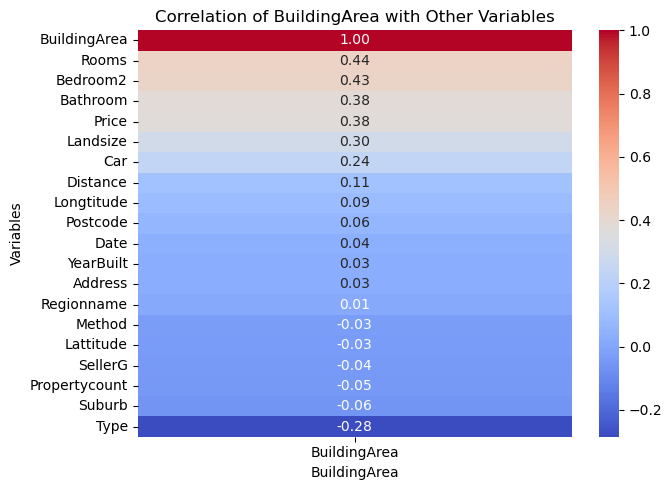

In [293]:
# Compute correlation matrix and visualize correlations with 'BuildingArea'
correlation_matrix_encoded = numeric_and_encoded_columns.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(
    correlation_matrix_encoded[['BuildingArea']].sort_values(by='BuildingArea', ascending=False),
    annot=True, cmap='coolwarm', cbar=True, fmt=".2f"
)
plt.title('Correlation of BuildingArea with Other Variables')
plt.xlabel('BuildingArea')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

We can see that 'BuildingArea' correlates with five other variables, namely 'Rooms', 'Bedroom2', 'Bathroom', 'Landsize', 'Type', above the threshold of 0.25. Thus, we will continue to use KNN to impute missing values for 'BuildingArea'.

**K-Nearest Neighbors (KNN) Imputation** <br>

Firstly, we perform an optimization to find the optimal number of K neighbors to use.

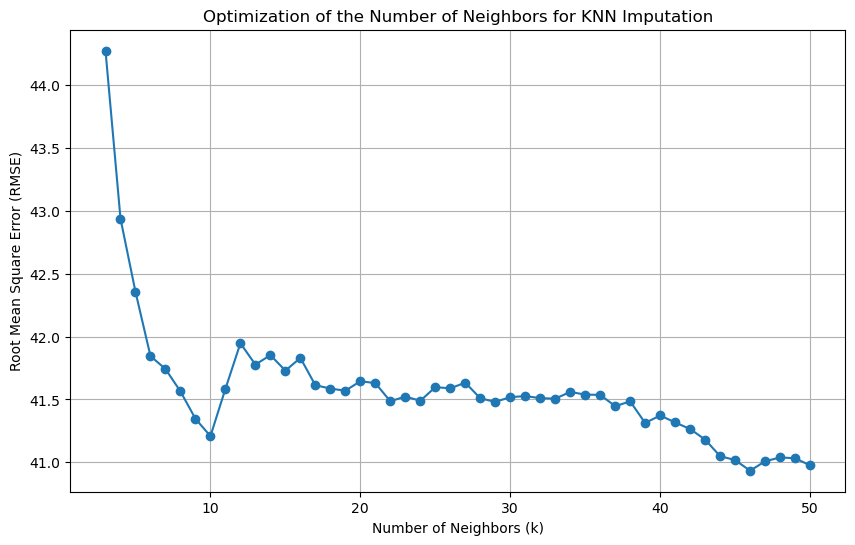

Optimal number of neighbors: 46


In [294]:
# Imputation of BuildingArea using KNN - using variables with a correlation of >= 0.25 (except price)
# Select relevant columns for testing imputation
columns_for_imputation = ['BuildingArea', 'Rooms', 'Bedroom2', 'Bathroom', 'Landsize', 'Type']
housing_data_encoded = housing_data.copy()

# Encode non-numeric columns
if 'Type' in columns_for_imputation:
    housing_data_encoded['Type'] = housing_data_encoded['Type'].astype('category').cat.codes

# Remove rows with missing values for testing
complete_data = housing_data_encoded.dropna(subset=columns_for_imputation)

# Split into train and test
train_data, test_data = train_test_split(complete_data, test_size=0.2, random_state=42)

# Introduce artificial missingness in the 'BuildingArea' column for testing
test_data_missing = test_data.copy()
mask = np.random.rand(len(test_data)) < 0.3  # Mask 30% of the values
test_data_missing.loc[mask, 'BuildingArea'] = np.nan

# Optimize n_neighbors
errors = []
n_neighbors_range = range(3, 51)

for k in n_neighbors_range:
    # Apply KNN imputation
    knn_imputer = KNNImputer(n_neighbors=k)
    imputed_data = knn_imputer.fit_transform(test_data_missing[columns_for_imputation])
    
    # Calculate error
    imputed_values = imputed_data[:, 0]  # Imputed 'BuildingArea'
    true_values = test_data['BuildingArea'].values
    error = root_mean_squared_error(true_values, imputed_values)
    errors.append(error)

# Plot errors to find the optimal n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, errors, marker='o')
plt.title("Optimization of the Number of Neighbors for KNN Imputation")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Root Mean Square Error (RMSE)")
plt.grid()
plt.show()

# Best n_neighbors
best_k = n_neighbors_range[np.argmin(errors)]
print(f"Optimal number of neighbors: {best_k}")



Using the optimal numbers of neigbors K we impute the missing values in 'BuildingArea'.

In [295]:
# Use KNN to impute BuildingArea based on variables with a correlation threshold of >= 0.25 (except Price)
# Select relevant columns for imputation
columns_for_imputation = ['BuildingArea', 'Rooms', 'Bedroom2', 'Bathroom', 'Landsize', 'Type']
housing_data_encoded = housing_data.copy()

# Encode non-numeric columns to include in KNN
if 'Type' in columns_for_imputation:
    housing_data_encoded['Type'] = housing_data_encoded['Type'].astype('category').cat.codes

# Apply KNN imputation to selected columns
knn_imputer = KNNImputer(n_neighbors=best_k)
imputed_data = knn_imputer.fit_transform(housing_data_encoded[columns_for_imputation])

# Update the original DataFrame with imputed values
housing_data.loc[:, 'BuildingArea'] = imputed_data[:, 0]

# Check for remaining missing values in 'BuildingArea'
print("Remaining Missing Values in BuildingArea:")
print(housing_data['BuildingArea'].isnull().sum())


Remaining Missing Values in BuildingArea:
0


After handling the missing data in all four columns, we perform a final check to confirm that there are in fact no  missing values left in our data set.


In [296]:
print("\nPost-Cleaning Missing Data:")
missing_data = housing_data.isnull().sum()
missing_percentage = (missing_data / len(housing_data)) * 100
missing_report = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})
print(missing_report[missing_report['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False))


Post-Cleaning Missing Data:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


### 1.2 Other Data Cleaning

In [297]:
# Check for invalid entires in Landsize (where Landsize = 0)
landsizes_equal_zero = (housing_data['Landsize'] == 0).sum()
print(f"Number of Landsize values equal to 0: {landsizes_equal_zero}")

Number of Landsize values equal to 0: 1937


In [298]:
# Update Landsize to be equal to BuildingArea where Landsize is 0
housing_data.loc[housing_data['Landsize'] == 0, 'Landsize'] = housing_data['BuildingArea']
housing_data[['BuildingArea', 'Landsize']]

BuildingArea  Landsize
0        120.558696     202.0
1         79.000000     156.0
2        150.000000     134.0
3         97.934783      94.0
4        142.000000     120.0
...             ...       ...
13185    202.988043     652.0
13186    133.000000     333.0
13187    166.000000     436.0
13188    157.000000     866.0
13189    112.000000     362.0

[13131 rows x 2 columns]

In [299]:
# Convert the date into a discrete number
housing_data['time'] = housing_data['Date'].apply(lambda x: x.year * 365 + x.month * 12 + x.day * 30)

# Normalize the time column
housing_data['time_cont'] = (housing_data['time'] - housing_data['time'].min()) / (housing_data['time'].max() - housing_data['time'].min())

# Display the updated dataset's first few rows to confirm the addition
print(f"Normalized time: \n{housing_data[['Date', 'time', 'time_cont']].head()}\n")

# Show the latest and oldest time
latest_time = housing_data['time_cont'].max()
oldest_time = housing_data['time_cont'].min()

print(f"Latest time: {latest_time}")
print(f"Oldest time: {oldest_time}")


Normalized time: 
        Date    time  time_cont
0 2016-12-03  736074   0.076596
1 2016-02-04  735984   0.000000
2 2017-03-04  736361   0.320851
3 2017-03-04  736361   0.320851
4 2016-06-04  736032   0.040851

Latest time: 1.0
Oldest time: 0.0


In [300]:
# Add cosine of time_cont
housing_data['time_cos'] = np.cos(2 * np.pi * housing_data['time_cont'])

# Add a column with the square of time_cont
housing_data['time_sq'] = housing_data['time_cont'] ** 2

# Display the updated dataset's first few rows to confirm the addition
housing_data[['time_cont', 'time_cos', 'time_sq']].head()


time_cont  time_cos   time_sq
0   0.076596  0.886410  0.005867
1   0.000000  1.000000  0.000000
2   0.320851 -0.430612  0.102945
3   0.320851 -0.430612  0.102945
4   0.040851  0.967239  0.001669

In [301]:
# Dropping unnecessary columns
columns_to_drop = ['Land_price_per_m2', 'Building_and_land_price_per_m2']
housing_data = housing_data.drop(columns=columns_to_drop, errors='ignore')

## 2. Exploratory Data Analysis (EDA)

In [302]:
# Get an overview of the cleaned dataset
housing_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13131 entries, 0 to 13189
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13131 non-null  object        
 1   Address        13131 non-null  object        
 2   Rooms          13131 non-null  int64         
 3   Type           13131 non-null  object        
 4   Price          13131 non-null  float64       
 5   Method         13131 non-null  object        
 6   SellerG        13131 non-null  object        
 7   Date           13131 non-null  datetime64[ns]
 8   Distance       13131 non-null  float64       
 9   Postcode       13131 non-null  Int64         
 10  Bedroom2       13131 non-null  Int64         
 11  Bathroom       13131 non-null  Int64         
 12  Car            13131 non-null  Int64         
 13  Landsize       13131 non-null  float64       
 14  BuildingArea   13131 non-null  float64       
 15  YearBuilt      13131 non

## Correlation Matrix - initial analysis

In [303]:
numeric_columns = ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
                   'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
categorical_columns = ['Type', 'Method', 'SellerG']

# Numeric vs Numeric Correlation
numeric_correlation = housing_data[numeric_columns].corr()

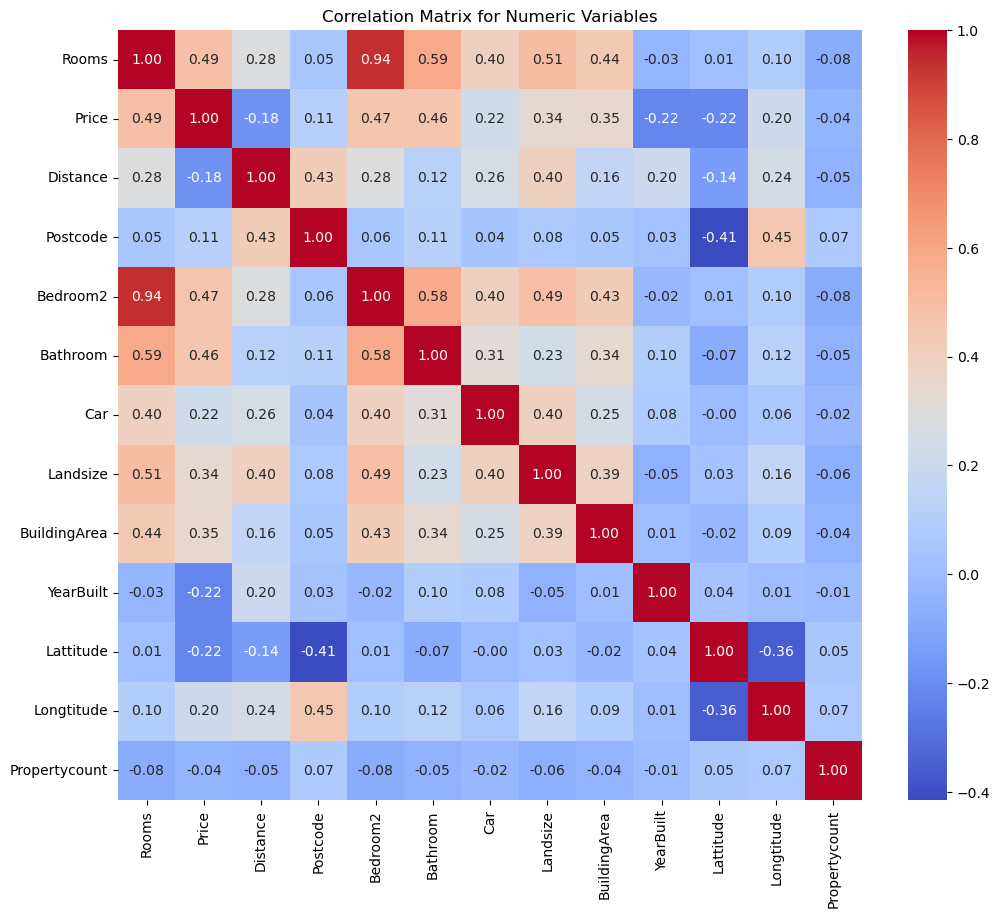

In [304]:
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix for Numeric Variables")
plt.show()

#### Highly correlated variables - **over the threshold of 0.5**

In [305]:
# Find pairs of variables with high correlation
threshold = 0.5

high_correlation = (numeric_correlation.abs() >= threshold)

high_corr_pairs = [
    (var1, var2) for var1 in high_correlation.index for var2 in high_correlation.columns
    if high_correlation.loc[var1, var2] and var1 != var2
]


high_corr_pairs = set(tuple(sorted(pair)) for pair in high_corr_pairs)


high_corr_pairs_sorted = sorted(list(high_corr_pairs))
high_corr_pairs_sorted

[('Bathroom', 'Bedroom2'),
 ('Bathroom', 'Rooms'),
 ('Bedroom2', 'Rooms'),
 ('Landsize', 'Rooms')]

## Regional Price Analysis

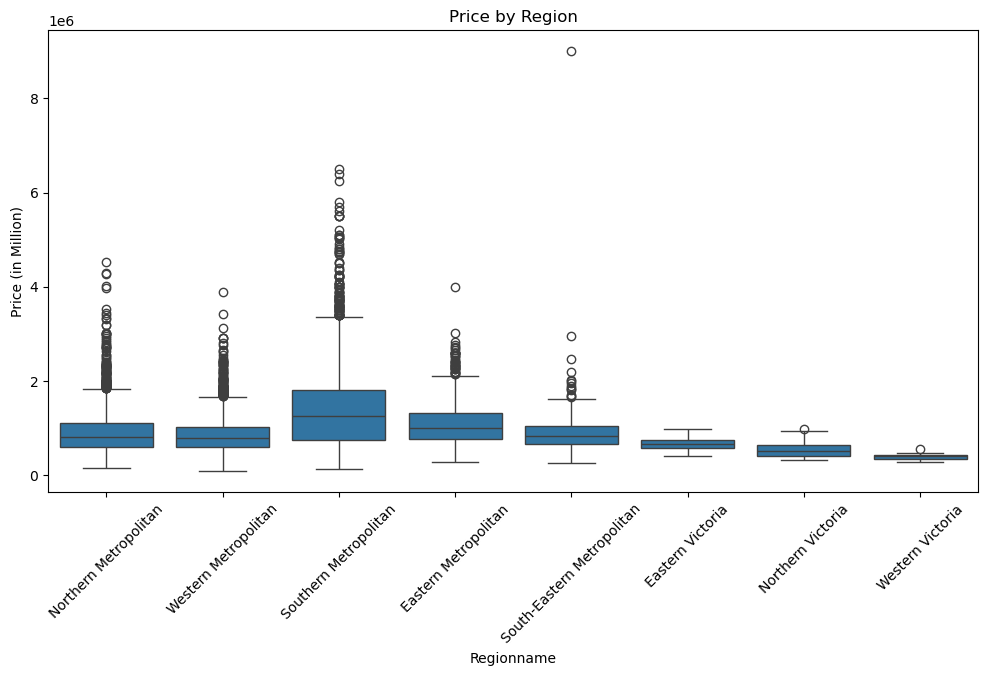

In [306]:
# Boxplots by Regions
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Regionname', y = 'Price', data = housing_data)
plt.xticks(rotation = 45)
plt.title("Price by Region")
plt.ylabel('Price (in Million)')
plt.show()

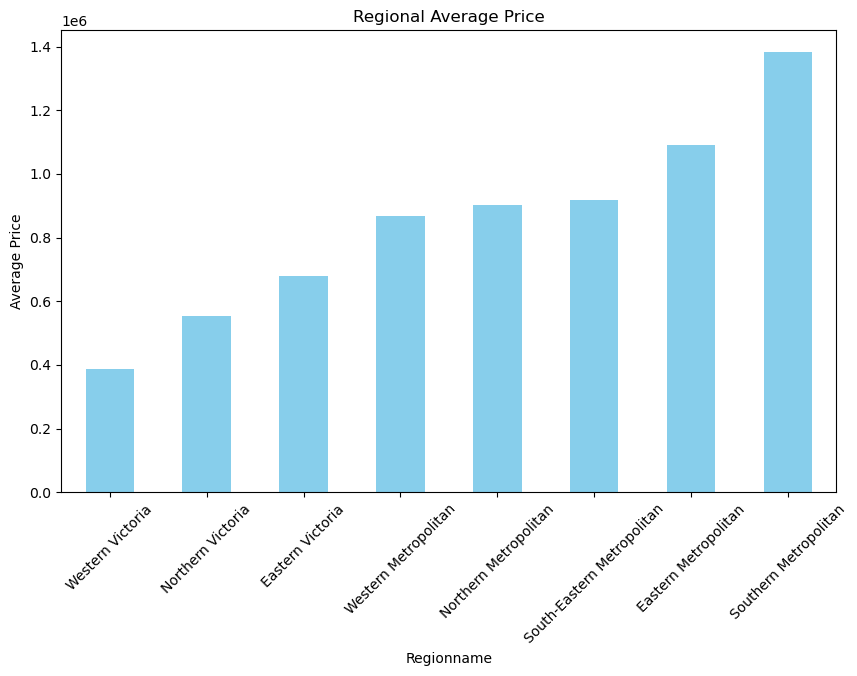

In [307]:
# Barplot of average price per region
# Group by region and calculate mean price per sqm
region_avg = housing_data.groupby('Regionname')['Price'].mean().sort_values()

# Bar plot
plt.figure(figsize=(10, 6))
region_avg.plot(kind='bar', color='skyblue')
plt.ylabel("Average Price")
plt.title("Regional Average Price")
plt.xticks(rotation=45)
plt.show()

/var/folders/b0/3lm1b6yx0z52q8tv2nvq6qc40000gn/T/ipykernel_74497/4231524721.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


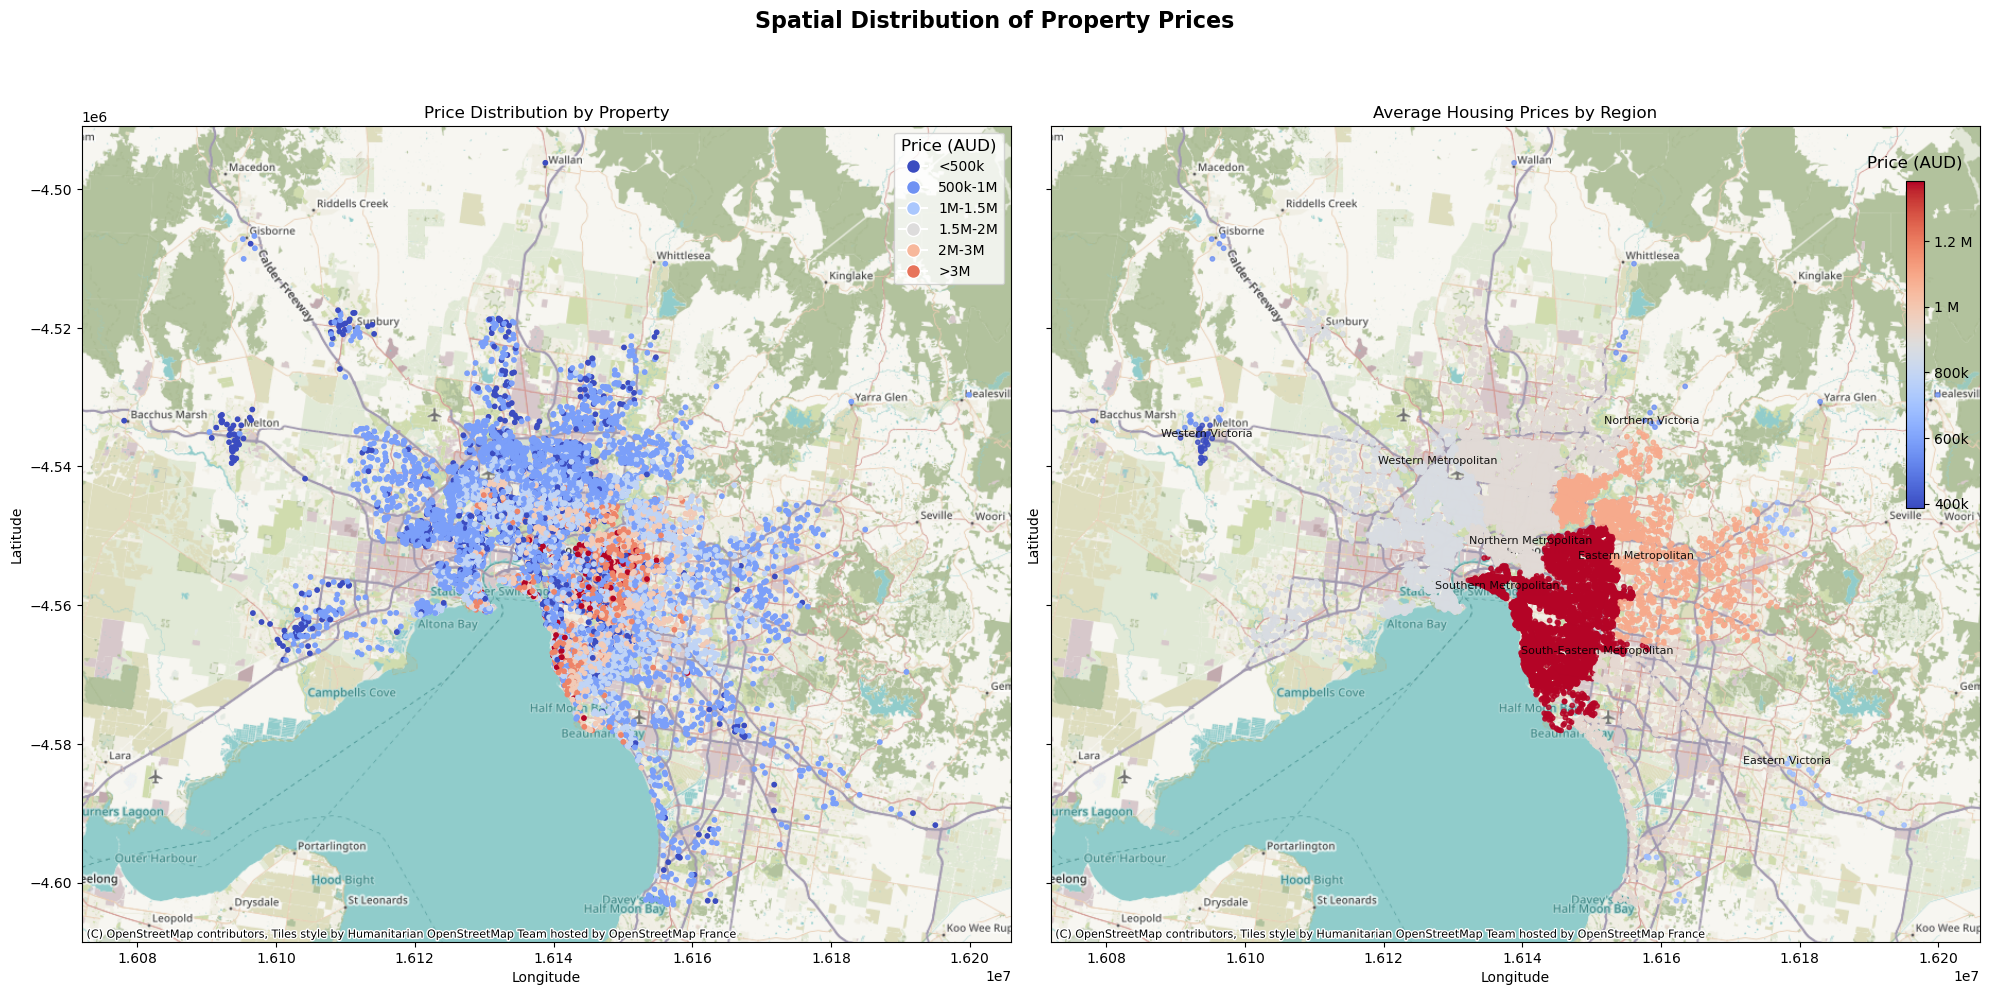

In [308]:
# Filter and prepare data
geo_data = housing_data[['Lattitude', 'Longtitude', 'Price']]
gdf1 = gpd.GeoDataFrame(
    geo_data, geometry=gpd.points_from_xy(geo_data.Longtitude, geo_data.Lattitude)
)
gdf1.set_crs(epsg=4326, inplace=True)
gdf1 = gdf1.to_crs(epsg=3857)

# Define price bins and labels
price_bins = [0, 500000, 1000000, 1500000, 2000000, 3000000, gdf1['Price'].max()]
price_labels = ['<500k', '500k-1M', '1M-1.5M', '1.5M-2M', '2M-3M', '>3M']
gdf1['Price Range'] = pd.cut(gdf1['Price'], bins=price_bins, labels=price_labels)

# Second Plot: Average Housing Prices by Region
filtered_data = housing_data.dropna(subset=['Price', 'Lattitude', 'Longtitude', 'Regionname'])
average_price_per_region = filtered_data.groupby('Regionname')['Price'].mean().reset_index()
region_geo = filtered_data[['Regionname', 'Lattitude', 'Longtitude']].drop_duplicates()
merged_data = region_geo.merge(average_price_per_region, on='Regionname')

# Create GeoDataFrame for second plot
gdf2 = gpd.GeoDataFrame(
    merged_data,
    geometry=gpd.points_from_xy(merged_data['Longtitude'], merged_data['Lattitude']),
    crs="EPSG:4326"
)
gdf2.set_crs(epsg=4326, inplace=True)
gdf2 = gdf2.to_crs(epsg=3857)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle("Spatial Distribution of Property Prices", fontsize=16, fontweight='bold')

# First subplot: Price Distribution by Property
ax1 = axes[0]
gdf1_plot = gdf1.plot(
    ax=ax1, column='Price Range', cmap='coolwarm', markersize=10, categorical=True, legend=False, aspect=1
)
ctx.add_basemap(ax1, crs=gdf1.crs)
ax1.set_title("Price Distribution by Property")
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")

# Add legend for price ranges to the first subplot
legend_handles1 = [
    plt.Line2D([0], [0], marker='o', color='w', label=label,
               markerfacecolor=plt.cm.coolwarm(i / len(price_labels)), markersize=10)
    for i, label in enumerate(price_labels)
]
ax1.legend(
    handles=legend_handles1, title="Price (AUD)", loc='upper right', fontsize=10, title_fontsize=12
)

# Second subplot: Average Housing Prices by Region (Continuous Scale)
ax2 = axes[1]
gdf2_plot = gdf2.plot(
    ax=ax2, column='Price', cmap='coolwarm', markersize=10, alpha=0.8, legend=False, aspect=1
)
ctx.add_basemap(ax2, crs=gdf2.crs)
ax2.set_title("Average Housing Prices by Region")
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")

# Add region labels to the second plot
unique_labels = gdf2.drop_duplicates(subset='Regionname')
for x, y, label in zip(unique_labels.geometry.x, unique_labels.geometry.y, unique_labels['Regionname']):
    ax2.text(x, y, label, fontsize=8, ha='center', color='black', alpha=0.9)

# Add a continuous legend as an overlay on the second plot
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=gdf2['Price'].min(), vmax=gdf2['Price'].max()))
sm._A = []  # Required for ScalarMappable

# Define custom ticks and labels
custom_ticks = [1_200_000, 1_000_000, 800_000, 600_000, 400_000]  # Values in AUD
custom_labels = ['1.2 M', '1 M', '800k', '600k', '400k']  # Custom labels

# Add color bar
cbar = plt.colorbar(sm, cax= inset_axes(ax2, width="2%", height="40%", loc='upper right', borderpad=4))
cbar.set_ticks(custom_ticks)  # Set tick positions
cbar.set_ticklabels(custom_labels)  # Set custom labels
cbar.ax.set_title('Price (AUD)', fontsize=12, pad=10)  # Label on top

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Marginal relationship between Price and Rooms, Bathrooms, Landsize, and Distance from CBD

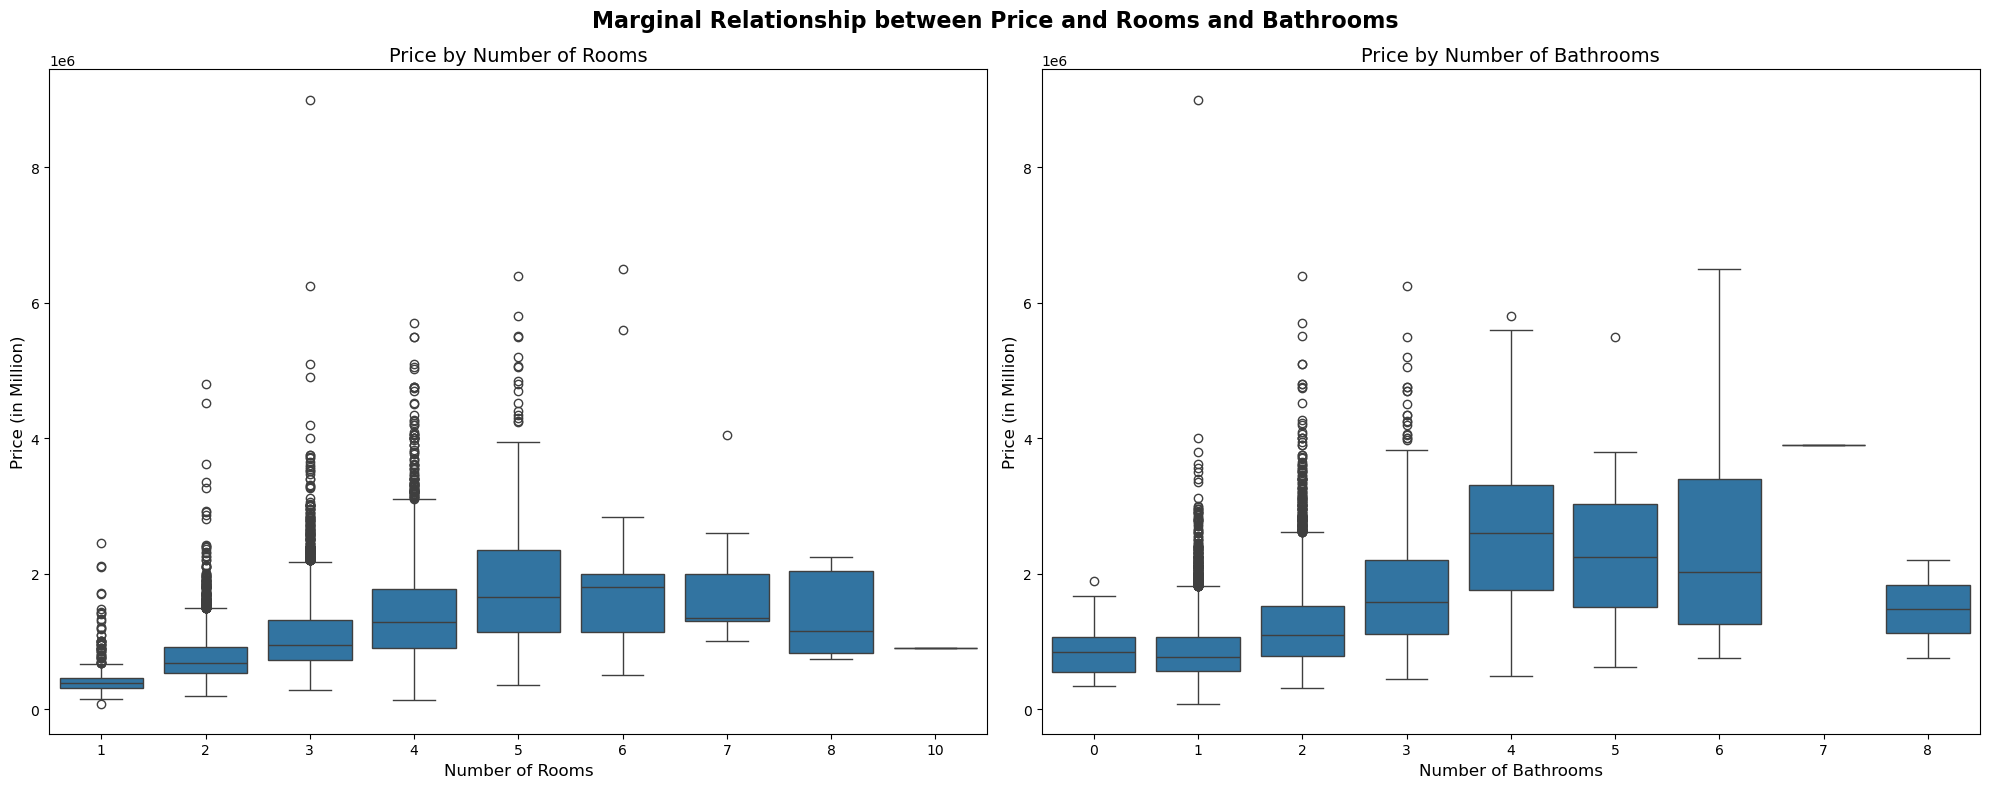

In [309]:
# Boxplots for marginal relationship
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Marginal Relationship between Price and Rooms and Bathrooms", fontsize=16, fontweight='bold')

# Boxplot for Price by Number of Rooms
sns.boxplot(ax=axes[0], x='Rooms', y='Price', data=housing_data)
axes[0].set_title("Price by Number of Rooms", fontsize=14)
axes[0].set_xlabel("Number of Rooms", fontsize=12)
axes[0].set_ylabel("Price (in Million)", fontsize=12)

# Boxplot for Price by Number of Bathrooms
sns.boxplot(ax=axes[1], x='Bathroom', y='Price', data=housing_data)
axes[1].set_title("Price by Number of Bathrooms", fontsize=14)
axes[1].set_xlabel("Number of Bathrooms", fontsize=12)
axes[1].set_ylabel("Price (in Million)", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


## 3. Feature Engineering

Number of Bedrooms, Rooms, Cars, Bathrooms and BuildingArea - log transformation

In [310]:
columns_to_transform = ['Rooms', 'Bathroom', 'Car', 'Bedroom2', 'Price', 'Distance', 'Landsize','Propertycount']

# Replace 0 with a small positive value (e.g., 1e-6) before applying log transformation
for column in columns_to_transform:
    housing_data[column] = housing_data[column].astype(float)
    housing_data[column] = housing_data[column].replace(0, 1e-6)  # Handling rows where == 0
    housing_data[f"log_{column}"] = np.log1p(housing_data[column])

YearSold

In [311]:
housing_data['Date'] = pd.to_datetime(housing_data['Date'], errors='coerce')

In [312]:
housing_data['YearSold'] = housing_data['Date'].dt.year
housing_data.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St    2.0    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St    2.0    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St    3.0    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La    3.0    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St    4.0    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom       Car  Landsize  \
0 2016-12-03       2.5      3067       2.0       1.0  1.000000     202.0   
1 2016-02-04       2.5      3067       2.0       1.0  0.000001     156.0   
2 2017-03-04       2.5      3067       3.0       2.0  0.000001     134.0   
3 2017-03-04       2.5      3067       3.0       2.0  1.000000      94.0   
4 2016-06-04       2.5      3067       3.0       1.0  2.000000     120.0   

   BuildingArea  YearBuilt  Lattitude  Longtitude             Regionname  \
0    120.558696       2007   -37.7996    144.9984  Northern Metropolitan   
1     79.000000       1900   -37.8079    144.9934  Northern Metropolitan   
2    150.000000       1900   -37.8093    144.9944  Northern Metropolitan   
3     97.934783       1978   -37.7969    144.9969  Northern Metropolitan   
4    142.000000       2014   -37.8072    144.9941  Northern Metropolitan   

   Propertycount    time  time_cont  time_cos   time_sq  log_Rooms  \
0         4019.0  736074   0.076596  0.886410  0.005867   1.098612   
1         4019.0  735984   0.000000  1.000000  0.000000   1.098612   
2         4019.0  736361   0.320851 -0.430612  0.102945   1.386294   
3         4019.0  736361   0.320851 -0.430612  0.102945   1.386294   
4         4019.0  736032   0.040851  0.967239  0.001669   1.609438   

   log_Bathroom       log_Car  log_Bedroom2  log_Price  log_Distance  \
0      0.693147  6.931472e-01      1.098612  14.207553      1.252763   
1      0.693147  9.999995e-07      1.098612  13.849913      1.252763   
2      1.098612  9.999995e-07      1.386294  14.197366      1.252763   
3      1.098612  6.931472e-01      1.386294  13.652993      1.252763   
4      0.693147  1.098612e+00      1.386294  14.285515      1.252763   

   log_Landsize  log_Propertycount  YearSold  
0      5.313206           8.299037      2016  
1      5.056246           8.299037      2016  
2      4.905275           8.299037      2017  
3      4.553877           8.299037      2017  
4      4.795791           8.299037      2016

HouseAge

In [313]:
housing_data['HouseAge'] = housing_data['YearSold'] - housing_data['YearBuilt']
housing_data['HouseAge'] = housing_data['HouseAge'].astype(float)

Grouping by Regionname - based on Average Housing Prices by Region Map

In [314]:
region_groups = {
    'Northern Metropolitan': 'NSSE_Metropolitan',
    'Southern Metropolitan': 'NSSE_Metropolitan',
    'South-Eastern Metropolitan': 'NSSE_Metropolitan',
    'Eastern Metropolitan': 'E_Metropolitan',
    'Western Metropolitan': 'W_Metropolitan',
    'Western Victoria': 'WNE_Victoria',
    'Northern Victoria': 'WNE_Victoria',
    'Eastern Victoria': 'WNE_Victoria'
}

# Map the 'Regionname' column to the new region groups
housing_data['RegionGroup'] = housing_data['Regionname'].map(region_groups)

# Create dummy variables for the new RegionGroup
housing_data = pd.get_dummies(housing_data, columns=['RegionGroup'], drop_first=False)
housing_data.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St    2.0    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St    2.0    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St    3.0    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La    3.0    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St    4.0    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom       Car  Landsize  \
0 2016-12-03       2.5      3067       2.0       1.0  1.000000     202.0   
1 2016-02-04       2.5      3067       2.0       1.0  0.000001     156.0   
2 2017-03-04       2.5      3067       3.0       2.0  0.000001     134.0   
3 2017-03-04       2.5      3067       3.0       2.0  1.000000      94.0   
4 2016-06-04       2.5      3067       3.0       1.0  2.000000     120.0   

   BuildingArea  YearBuilt  Lattitude  Longtitude             Regionname  \
0    120.558696       2007   -37.7996    144.9984  Northern Metropolitan   
1     79.000000       1900   -37.8079    144.9934  Northern Metropolitan   
2    150.000000       1900   -37.8093    144.9944  Northern Metropolitan   
3     97.934783       1978   -37.7969    144.9969  Northern Metropolitan   
4    142.000000       2014   -37.8072    144.9941  Northern Metropolitan   

   Propertycount    time  time_cont  time_cos   time_sq  log_Rooms  \
0         4019.0  736074   0.076596  0.886410  0.005867   1.098612   
1         4019.0  735984   0.000000  1.000000  0.000000   1.098612   
2         4019.0  736361   0.320851 -0.430612  0.102945   1.386294   
3         4019.0  736361   0.320851 -0.430612  0.102945   1.386294   
4         4019.0  736032   0.040851  0.967239  0.001669   1.609438   

   log_Bathroom       log_Car  log_Bedroom2  log_Price  log_Distance  \
0      0.693147  6.931472e-01      1.098612  14.207553      1.252763   
1      0.693147  9.999995e-07      1.098612  13.849913      1.252763   
2      1.098612  9.999995e-07      1.386294  14.197366      1.252763   
3      1.098612  6.931472e-01      1.386294  13.652993      1.252763   
4      0.693147  1.098612e+00      1.386294  14.285515      1.252763   

   log_Landsize  log_Propertycount  YearSold  HouseAge  \
0      5.313206           8.299037      2016       9.0   
1      5.056246           8.299037      2016     116.0   
2      4.905275           8.299037      2017     117.0   
3      4.553877           8.299037      2017      39.0   
4      4.795791           8.299037      2016       2.0   

   RegionGroup_E_Metropolitan  RegionGroup_NSSE_Metropolitan  \
0                       False                           True   
1                       False                           True   
2                       False                           True   
3                       False                           True   
4                       False                           True   

   RegionGroup_WNE_Victoria  RegionGroup_W_Metropolitan  
0                     False                       False  
1                     False                       False  
2                     False                       False  
3                     False                       False  
4                     False                       False

Method - dummy

In [315]:
housing_data = pd.get_dummies(housing_data, columns=['Method'], prefix='Method', drop_first=False)
housing_data.head()

Suburb           Address  Rooms Type      Price SellerG       Date  \
0  Abbotsford      85 Turner St    2.0    h  1480000.0  Biggin 2016-12-03   
1  Abbotsford   25 Bloomburg St    2.0    h  1035000.0  Biggin 2016-02-04   
2  Abbotsford      5 Charles St    3.0    h  1465000.0  Biggin 2017-03-04   
3  Abbotsford  40 Federation La    3.0    h   850000.0  Biggin 2017-03-04   
4  Abbotsford       55a Park St    4.0    h  1600000.0  Nelson 2016-06-04   

   Distance  Postcode  Bedroom2  Bathroom       Car  Landsize  BuildingArea  \
0       2.5      3067       2.0       1.0  1.000000     202.0    120.558696   
1       2.5      3067       2.0       1.0  0.000001     156.0     79.000000   
2       2.5      3067       3.0       2.0  0.000001     134.0    150.000000   
3       2.5      3067       3.0       2.0  1.000000      94.0     97.934783   
4       2.5      3067       3.0       1.0  2.000000     120.0    142.000000   

   YearBuilt  Lattitude  Longtitude             Regionname  Propertycount  \
0       2007   -37.7996    144.9984  Northern Metropolitan         4019.0   
1       1900   -37.8079    144.9934  Northern Metropolitan         4019.0   
2       1900   -37.8093    144.9944  Northern Metropolitan         4019.0   
3       1978   -37.7969    144.9969  Northern Metropolitan         4019.0   
4       2014   -37.8072    144.9941  Northern Metropolitan         4019.0   

     time  time_cont  time_cos   time_sq  log_Rooms  log_Bathroom  \
0  736074   0.076596  0.886410  0.005867   1.098612      0.693147   
1  735984   0.000000  1.000000  0.000000   1.098612      0.693147   
2  736361   0.320851 -0.430612  0.102945   1.386294      1.098612   
3  736361   0.320851 -0.430612  0.102945   1.386294      1.098612   
4  736032   0.040851  0.967239  0.001669   1.609438      0.693147   

        log_Car  log_Bedroom2  log_Price  log_Distance  log_Landsize  \
0  6.931472e-01      1.098612  14.207553      1.252763      5.313206   
1  9.999995e-07      1.098612  13.849913      1.252763      5.056246   
2  9.999995e-07      1.386294  14.197366      1.252763      4.905275   
3  6.931472e-01      1.386294  13.652993      1.252763      4.553877   
4  1.098612e+00      1.386294  14.285515      1.252763      4.795791   

   log_Propertycount  YearSold  HouseAge  RegionGroup_E_Metropolitan  \
0           8.299037      2016       9.0                       False   
1           8.299037      2016     116.0                       False   
2           8.299037      2017     117.0                       False   
3           8.299037      2017      39.0                       False   
4           8.299037      2016       2.0                       False   

   RegionGroup_NSSE_Metropolitan  RegionGroup_WNE_Victoria  \
0                           True                     False   
1                           True                     False   
2                           True                     False   
3                           True                     False   
4                           True                     False   

   RegionGroup_W_Metropolitan  Method_PI  Method_S  Method_SA  Method_SP  \
0                       False      False      True      False      False   
1                       False      False      True      False      False   
2                       False      False     False      False       True   
3                       False       True     False      False      False   
4                       False      False     False      False      False   

   Method_VB  
0      False  
1      False  
2      False  
3      False  
4       True

**Type** - creating dummies

h- house,cottage,villa, semi,terrace; u- unit, duplex; t- townhouse 

In [316]:
type_dummies = pd.get_dummies(housing_data['Type'], prefix='Type', drop_first=False)

housing_data = pd.concat([housing_data, type_dummies], axis=1)

housing_data.head()

Suburb           Address  Rooms Type      Price SellerG       Date  \
0  Abbotsford      85 Turner St    2.0    h  1480000.0  Biggin 2016-12-03   
1  Abbotsford   25 Bloomburg St    2.0    h  1035000.0  Biggin 2016-02-04   
2  Abbotsford      5 Charles St    3.0    h  1465000.0  Biggin 2017-03-04   
3  Abbotsford  40 Federation La    3.0    h   850000.0  Biggin 2017-03-04   
4  Abbotsford       55a Park St    4.0    h  1600000.0  Nelson 2016-06-04   

   Distance  Postcode  Bedroom2  Bathroom       Car  Landsize  BuildingArea  \
0       2.5      3067       2.0       1.0  1.000000     202.0    120.558696   
1       2.5      3067       2.0       1.0  0.000001     156.0     79.000000   
2       2.5      3067       3.0       2.0  0.000001     134.0    150.000000   
3       2.5      3067       3.0       2.0  1.000000      94.0     97.934783   
4       2.5      3067       3.0       1.0  2.000000     120.0    142.000000   

   YearBuilt  Lattitude  Longtitude             Regionname  Propertycount  \
0       2007   -37.7996    144.9984  Northern Metropolitan         4019.0   
1       1900   -37.8079    144.9934  Northern Metropolitan         4019.0   
2       1900   -37.8093    144.9944  Northern Metropolitan         4019.0   
3       1978   -37.7969    144.9969  Northern Metropolitan         4019.0   
4       2014   -37.8072    144.9941  Northern Metropolitan         4019.0   

     time  time_cont  time_cos   time_sq  log_Rooms  log_Bathroom  \
0  736074   0.076596  0.886410  0.005867   1.098612      0.693147   
1  735984   0.000000  1.000000  0.000000   1.098612      0.693147   
2  736361   0.320851 -0.430612  0.102945   1.386294      1.098612   
3  736361   0.320851 -0.430612  0.102945   1.386294      1.098612   
4  736032   0.040851  0.967239  0.001669   1.609438      0.693147   

        log_Car  log_Bedroom2  log_Price  log_Distance  log_Landsize  \
0  6.931472e-01      1.098612  14.207553      1.252763      5.313206   
1  9.999995e-07      1.098612  13.849913      1.252763      5.056246   
2  9.999995e-07      1.386294  14.197366      1.252763      4.905275   
3  6.931472e-01      1.386294  13.652993      1.252763      4.553877   
4  1.098612e+00      1.386294  14.285515      1.252763      4.795791   

   log_Propertycount  YearSold  HouseAge  RegionGroup_E_Metropolitan  \
0           8.299037      2016       9.0                       False   
1           8.299037      2016     116.0                       False   
2           8.299037      2017     117.0                       False   
3           8.299037      2017      39.0                       False   
4           8.299037      2016       2.0                       False   

   RegionGroup_NSSE_Metropolitan  RegionGroup_WNE_Victoria  \
0                           True                     False   
1                           True                     False   
2                           True                     False   
3                           True                     False   
4                           True                     False   

   RegionGroup_W_Metropolitan  Method_PI  Method_S  Method_SA  Method_SP  \
0                       False      False      True      False      False   
1                       False      False      True      False      False   
2                       False      False     False      False       True   
3                       False       True     False      False      False   
4                       False      False     False      False      False   

   Method_VB  Type_h  Type_t  Type_u  
0      False    True   False   False  
1      False    True   False   False  
2      False    True   False   False  
3      False    True   False   False  
4       True    True   False   False

Price vs log(Building Area)

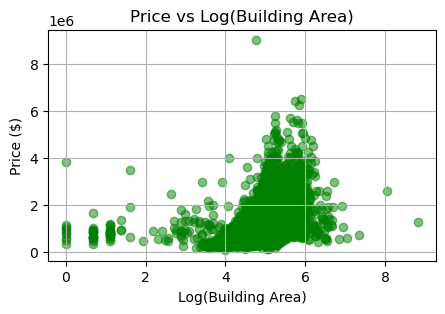

In [317]:
housing_data['log_Building_Area'] = np.log(housing_data['BuildingArea'])


plt.figure(figsize=(5, 3))
plt.scatter(housing_data['log_Building_Area'], housing_data['Price'], alpha=0.5, color='green')
plt.title("Price vs Log(Building Area)")
plt.xlabel("Log(Building Area)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

Interation Terms - log(Building Area) * Region Group

In [318]:
housing_data['log_Building_Area_RegionGroup_E_Metropolitan'] = housing_data['log_Building_Area']*housing_data['RegionGroup_E_Metropolitan']  
housing_data['log_Building_Area_RegionGroup_NSSE_Metropolitan'] = housing_data['log_Building_Area']*housing_data['RegionGroup_NSSE_Metropolitan']  
housing_data['log_Building_Area_RegionGroup_WNE_Victoria'] = housing_data['log_Building_Area']*housing_data['RegionGroup_WNE_Victoria']
housing_data['log_Building_Area_RegionGroup_W_Metropolitan']= housing_data['log_Building_Area']*housing_data['RegionGroup_W_Metropolitan']

#### House Age vs Price

House Age vs Price

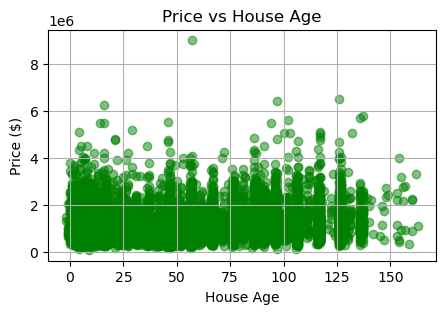

In [319]:
plt.figure(figsize=(5, 3))
plt.scatter(housing_data['HouseAge'], housing_data['Price'], alpha=0.5, color='green')
plt.title("Price vs House Age")
plt.xlabel("House Age")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

In [320]:
housing_data[housing_data['HouseAge']==0].head()

Suburb           Address  Rooms Type      Price     SellerG  \
37     Airport West     154 Halsey Rd    3.0    t   840000.0      Nelson   
358      Ascot Vale         10 Ayr St    3.0    h   965000.0  Alexkarbon   
526          Balwyn    316 Belmore Rd    4.0    h  1750000.0      Ascend   
1192  Brighton East  25 Camperdown St    5.0    h  2550000.0          RT   
1202  Brighton East      29 Cluden St    4.0    h  1706000.0      Buxton   

           Date  Distance  Postcode  Bedroom2  Bathroom       Car  Landsize  \
37   2016-09-03      13.5      3042       3.0       2.0  1.000000     303.0   
358  2016-08-28       5.9      3032       3.0       1.0  0.000001     216.0   
526  2016-12-10       9.7      3103       4.0       3.0  2.000000     453.0   
1192 2016-10-15      10.7      3187       5.0       3.0  2.000000     551.0   
1202 2016-09-17      10.7      3187       3.0       3.0  2.000000     538.0   

      BuildingArea  YearBuilt  Lattitude  Longtitude             Regionname  \
37      225.000000       2016   -37.7180    144.8780   Western Metropolitan   
358     139.363913       2016   -37.7792    144.9297   Western Metropolitan   
526     308.000000       2016   -37.8044    145.1006  Southern Metropolitan   
1192    346.000000       2016   -37.9176    145.0090  Southern Metropolitan   
1202    163.741915       2016   -37.9126    145.0110  Southern Metropolitan   

      Propertycount    time  time_cont  time_cos   time_sq  log_Rooms  \
37           3464.0  736038   0.045957  0.958598  0.002112   1.386294   
358          6567.0  736776   0.674043 -0.459342  0.454333   1.386294   
526          5682.0  736284   0.255319 -0.033415  0.065188   1.609438   
1192         6938.0  736410   0.362553 -0.649702  0.131445   1.791759   
1202         6938.0  736458   0.403404 -0.821403  0.162735   1.609438   

      log_Bathroom       log_Car  log_Bedroom2  log_Price  log_Distance  \
37        1.098612  6.931472e-01      1.386294  13.641158      2.674149   
358       0.693147  9.999995e-07      1.386294  13.779884      1.931521   
526       1.386294  1.098612e+00      1.609438  14.375127      2.370244   
1192      1.386294  1.098612e+00      1.791759  14.751604      2.459589   
1202      1.386294  1.098612e+00      1.386294  14.349663      2.459589   

      log_Landsize  log_Propertycount  YearSold  HouseAge  \
37        5.717028           8.150468      2016       0.0   
358       5.379897           8.789965      2016       0.0   
526       6.118097           8.645235      2016       0.0   
1192      6.313548           8.844913      2016       0.0   
1202      6.289716           8.844913      2016       0.0   

      RegionGroup_E_Metropolitan  RegionGroup_NSSE_Metropolitan  \
37                         False                          False   
358                        False                          False   
526                        False                           True   
1192                       False                           True   
1202                       False                           True   

      RegionGroup_WNE_Victoria  RegionGroup_W_Metropolitan  Method_PI  \
37                       False                        True       True   
358                      False                        True      False   
526                      False                       False       True   
1192                     False                       False       True   
1202                     False                       False      False   

      Method_S  Method_SA  Method_SP  Method_VB  Type_h  Type_t  Type_u  \
37       False      False      False      False   False    True   False   
358       True      False      False      False    True   False   False   
526      False      False      False      False    True   False   False   
1192     False      False      False      False    True   False   False   
1202      True      False      False      False    True   False   False   

      log_Building_Area  log_Building_Area_RegionGroup_E

In [321]:
len(housing_data[housing_data['HouseAge']==0])

59

In [322]:
housing_data[housing_data['HouseAge'].isna()]

Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, SellerG, Date, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, Lattitude, Longtitude, Regionname, Propertycount, time, time_cont, time_cos, time_sq, log_Rooms, log_Bathroom, log_Car, log_Bedroom2, log_Price, log_Distance, log_Landsize, log_Propertycount, YearSold, HouseAge, RegionGroup_E_Metropolitan, RegionGroup_NSSE_Metropolitan, RegionGroup_WNE_Victoria, RegionGroup_W_Metropolitan, Method_PI, Method_S, Method_SA, Method_SP, Method_VB, Type_h, Type_t, Type_u, log_Building_Area, log_Building_Area_RegionGroup_E_Metropolitan, log_Building_Area_RegionGroup_NSSE_Metropolitan, log_Building_Area_RegionGroup_WNE_Victoria, log_Building_Area_RegionGroup_W_Metropolitan]
Index: []

## Test and Training Set

In [323]:
# Perform a stratified split on the 'Regionname' column
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42, stratify=housing_data['Regionname'])

# Display the size of the training and test sets
print(f"Training set size: {train_set.shape[0]}")
print(f"Test set size: {test_set.shape[0]}")

# Display the first few rows of the training set to confirm the split
train_set.head()

Training set size: 10504
Test set size: 2627


Suburb             Address  Rooms Type      Price  \
6173         Thornbury      7/9 Hammond St    2.0    u   466000.0   
5800          Sunshine     17 Hampshire Rd    3.0    h   702000.0   
10151      Murrumbeena  217 Murrumbeena Rd    4.0    h  1540000.0   
1823   Caulfield South     28 Ellington St    4.0    h  1960000.0   
10424          Ivanhoe    3/40 Magnolia Rd    3.0    u   880000.0   

             SellerG       Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
6173        Woodards 2017-02-25       6.5      3071       2.0       1.0  1.0   
5800         Douglas 2016-09-10      12.6      3020       3.0       1.0  1.0   
10151       Woodards 2017-05-27      10.1      3163       4.0       2.0  2.0   
1823   hockingstuart 2016-04-16       9.3      3162       5.0       3.0  4.0   
10424          Barry 2017-07-08       7.8      3079       3.0       2.0  1.0   

       Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  \
6173      909.0    181.565217       1950  -37.76330   145.01030   
5800      542.0    182.997826       1950  -37.79490   144.83030   
10151     589.0    199.000000       1920  -37.90017   145.06435   
1823      708.0    208.934783       1930  -37.89230   145.01770   
10424     252.0    144.847826       1970  -37.75842   145.05075   

                  Regionname  Propertycount    time  time_cont  time_cos  \
6173   Northern Metropolitan         8870.0  736979   0.846809  0.571445   
5800    Western Metropolitan         3755.0  736248   0.224681  0.158415   
10151  Southern Metropolitan         4442.0  737075   0.928511  0.900803   
1823   Southern Metropolitan         5051.0  736368   0.326809 -0.464086   
10424   Eastern Metropolitan         5549.0  736529   0.463830 -0.974286   

        time_sq  log_Rooms  log_Bathroom   log_Car  log_Bedroom2  log_Price  \
6173   0.717085   1.098612      0.693147  0.693147      1.098612  13.051943   
5800   0.050481   1.386294      0.693147  0.693147      1.386294  13.461690   
10151  0.862132   1.609438      1.098612  1.098612      1.609438  14.247294   
1823   0.106804   1.609438      1.386294  1.609438      1.791759  14.488456   
10424  0.215138   1.386294      1.098612  0.693147      1.386294  13.687678   

       log_Distance  log_Landsize  log_Propertycount  YearSold  HouseAge  \
6173       2.014903      6.813445           9.090543      2017      67.0   
5800       2.610070      6.297109           8.231110      2016      66.0   
10151      2.406945      6.380123           8.399085      2017      97.0   
1823       2.332144      6.563856           8.527539      2016      86.0   
10424      2.174752      5.533389           8.621553      2017      47.0   

       RegionGroup_E_Metropolitan  RegionGroup_NSSE_Metropolitan  \
6173                        False                           True   
5800                        False                          False   
10151                       False                           True   
1823                        False                           True   
10424                        True                          False   

       RegionGroup_WNE_Victoria  RegionGroup_W_Metropolitan  Method_PI  \
6173                      False                       False      False   
5800                      False                        True      False   
10151                     False                       False      False   
1823                      False                       False       True   
10424                     False                       False      False   

       Method_S  Method_SA  Method_SP  Method_VB  Type_h  Type_t  Type_u  \
6173       True      False      False      False   False   False    True   
5800       True      False      False      False    True   False   False   
10151      True      False      False      False    True   False   False   
1823      False      False      False      False    True   False   False   
10424     False      False      False       True   False   False    True   

       log_Buildi

## Dropping unnecessary columns for the analysis

In [324]:
columns_to_drop = ['Suburb', 'Address','Rooms', 'Type', 'SellerG', 'Date', 'YearSold', 'Distance', 'Postcode', 'time', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude' ,'Longtitude', 'Regionname', 'Propertycount']
# columns_to_drop = ['Suburb', 'Address','Rooms' ,'SellerG', 'Date', 'Postcode', 'time', 'Bedroom2', 'Bathroom', 'Log_Building_Area','Car' ,'Lattitude', 'Distance','Longtitude' ,'Landsize', 'Propertycount' ,'Longtitude', 'Type', 'Regionname', 'YearBuilt', 'Car_Category', 'BuildingArea','BuildingArea_missing', 'Car_Category', 'YearSold']
train_set = train_set.drop(columns=columns_to_drop, errors='ignore')
test_set = test_set.drop(columns=columns_to_drop, errors='ignore')

train_set.head()

Price  time_cont  time_cos   time_sq  log_Rooms  log_Bathroom  \
6173    466000.0   0.846809  0.571445  0.717085   1.098612      0.693147   
5800    702000.0   0.224681  0.158415  0.050481   1.386294      0.693147   
10151  1540000.0   0.928511  0.900803  0.862132   1.609438      1.098612   
1823   1960000.0   0.326809 -0.464086  0.106804   1.609438      1.386294   
10424   880000.0   0.463830 -0.974286  0.215138   1.386294      1.098612   

        log_Car  log_Bedroom2  log_Price  log_Distance  log_Landsize  \
6173   0.693147      1.098612  13.051943      2.014903      6.813445   
5800   0.693147      1.386294  13.461690      2.610070      6.297109   
10151  1.098612      1.609438  14.247294      2.406945      6.380123   
1823   1.609438      1.791759  14.488456      2.332144      6.563856   
10424  0.693147      1.386294  13.687678      2.174752      5.533389   

       log_Propertycount  HouseAge  RegionGroup_E_Metropolitan  \
6173            9.090543      67.0                       False   
5800            8.231110      66.0                       False   
10151           8.399085      97.0                       False   
1823            8.527539      86.0                       False   
10424           8.621553      47.0                        True   

       RegionGroup_NSSE_Metropolitan  RegionGroup_WNE_Victoria  \
6173                            True                     False   
5800                           False                     False   
10151                           True                     False   
1823                            True                     False   
10424                          False                     False   

       RegionGroup_W_Metropolitan  Method_PI  Method_S  Method_SA  Method_SP  \
6173                        False      False      True      False      False   
5800                         True      False      True      False      False   
10151                       False      False      True      False      False   
1823                        False       True     False      False      False   
10424                       False      False     False      False      False   

       Method_VB  Type_h  Type_t  Type_u  log_Building_Area  \
6173       False   False   False    True           5.201615   
5800       False    True   False   False           5.209474   
10151      False    True   False   False           5.293305   
1823       False    True   False   False           5.342022   
10424       True   False   False    True           4.975684   

       log_Building_Area_RegionGroup_E_Metropolitan  \
6173                                       0.000000   
5800                                       0.000000   
10151                                      0.000000   
1823                                       0.000000   
10424                                      4.975684   

       log_Building_Area_RegionGroup_NSSE_Metropolitan  \
6173                                          5.201615   
5800                                          0.000000   
10151                                         5.293305   
1823                                          5.342022   
10424                                         0.000000   

       log_Building_Area_RegionGroup_WNE_Victoria  \
6173                                          0.0   
5800                                          0.0   
10151                                         0.0   
1823                                          0.0   
10424                                         0.0   

       log_Building_Area_RegionGroup_W_Metropolitan  
6173                                       0.000000  
5800                                       5.209474  
10151                                      0.000000  
1823                                       0.000000  
10424                                      0.000000

## Correlations

##### Numerical vs Numerical

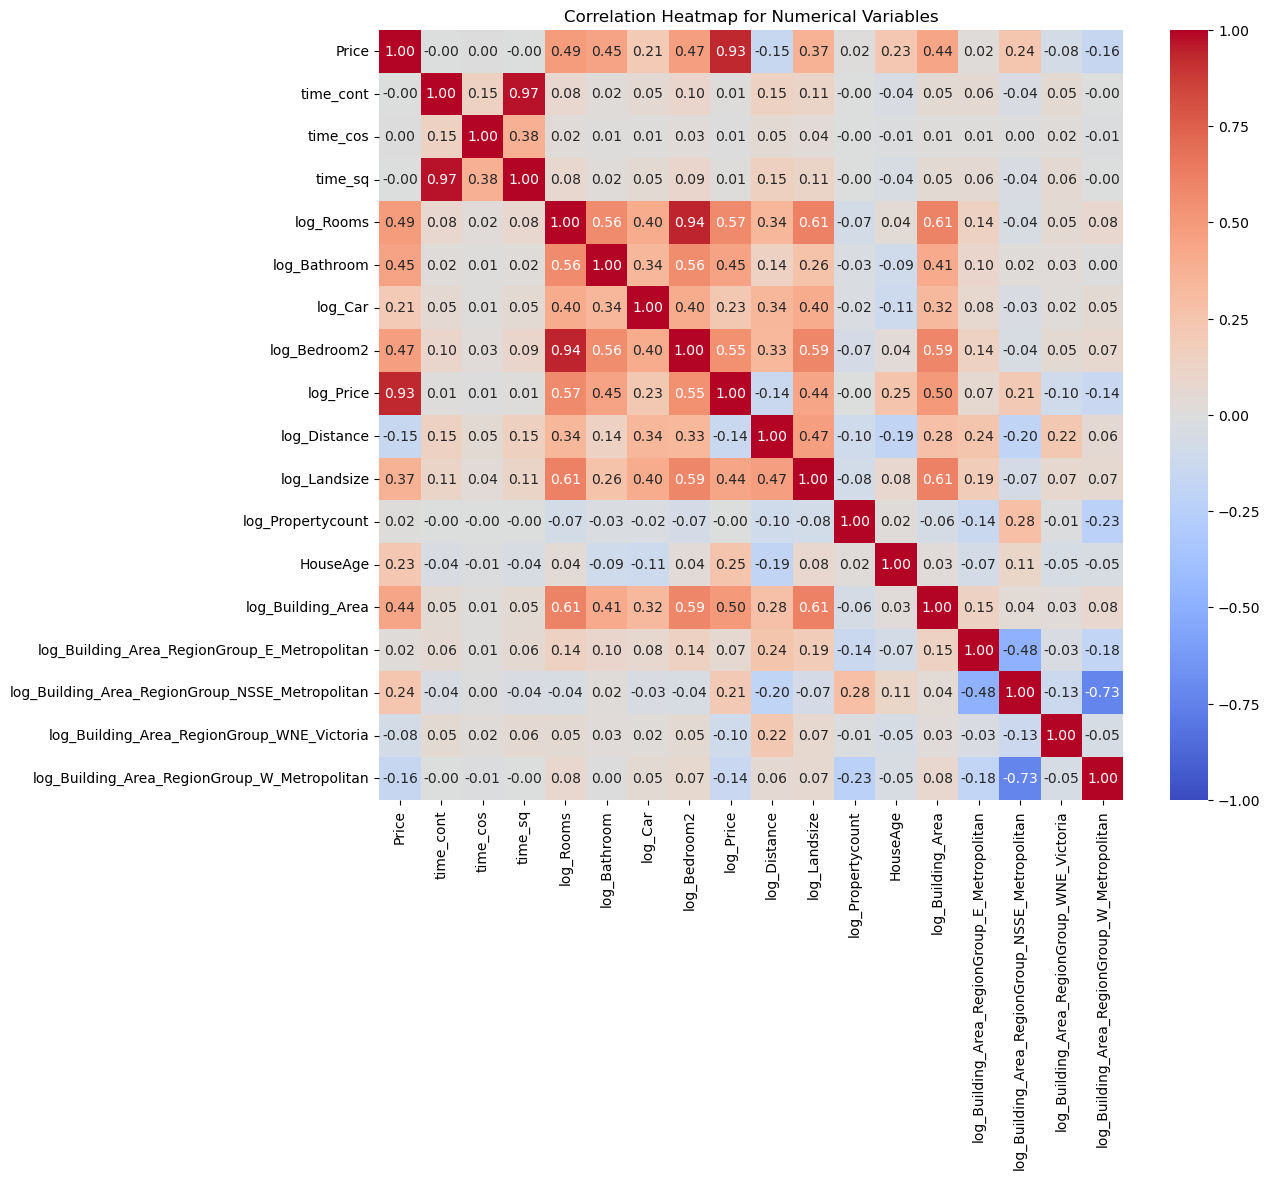

In [325]:
numerical_cols = train_set.select_dtypes(include=[np.number]).columns
correlation_matrix = train_set[numerical_cols].corr()

# Heatmap of numerical correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

In [326]:
high_corr_pairs = [
    (col1, col2, correlation_matrix.loc[col1, col2])
    for col1 in correlation_matrix.columns
    for col2 in correlation_matrix.columns
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.7
]
high_corr_pairs=pd.DataFrame(high_corr_pairs)
high_corr_pairs

0  \
0                                            Price   
1                                        time_cont   
2                                          time_sq   
3                                        log_Rooms   
4                                     log_Bedroom2   
5                                        log_Price   
6  log_Building_Area_RegionGroup_NSSE_Metropolitan   
7     log_Building_Area_RegionGroup_W_Metropolitan   

                                                 1         2  
0                                        log_Price  0.934327  
1                                          time_sq  0.969021  
2                                        time_cont  0.969021  
3                                     log_Bedroom2  0.944773  
4                                        log_Rooms  0.944773  
5                                            Price  0.934327  
6     log_Building_Area_RegionGroup_W_Metropolitan -0.727667  
7  log_Building_Area_RegionGroup_NSSE_Metropolitan -0.727667

##### Categorical vs Categorical

In [327]:
categorical_cols = train_set.select_dtypes(include=["object", "category"]).columns


categorical_corr_optimized = {}
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            contingency_table = pd.crosstab(train_set[col1], train_set[col2])
            chi2, p, _, _ = chi2_contingency(contingency_table, correction=False)
            if p < 0.05:
                categorical_corr_optimized[(col1, col2)] = p

categorical_corr_optimized

{}

##### Numerical vs Categorical

In [328]:
categorical_vs_numerical_corr_optimized = {}
for cat_col in categorical_cols:
    unique_values = train_set[cat_col].nunique()
    if unique_values <= 10: 
        for num_col in numerical_cols:
            anova_p = f_oneway(
                *[train_set[train_set[cat_col] == category][num_col].dropna()
                  for category in train_set[cat_col].unique()]
            ).pvalue
            if anova_p < 0.05:
                categorical_vs_numerical_corr_optimized[(cat_col, num_col)] = anova_p

categorical_vs_numerical_corr_optimized

{}

## Metrics

In [329]:
metrics_df = pd.DataFrame(columns=['Model', 'RMSE'])

## Model's Benchmark
Choosing dummies as a benchmark to exclude from the model to avoid multicollinearity

In [330]:
region = 'RegionGroup_W_Metropolitan'
region_interaction = 'log_Building_Area_RegionGroup_W_Metropolitan'
method = 'Method_S'
type_property = 'Type_h'

##### HELPER FUNCTION - NAMES OF ALL THE COLUMNS

In [331]:
concatenated_columns = ' + '.join(col for col in train_set.columns if col not in ['log_Price', f'{region}', f'{method}', f'{type_property}', f'{region_interaction}'])
concatenated_columns

'Price + time_cont + time_cos + time_sq + log_Rooms + log_Bathroom + log_Car + log_Bedroom2 + log_Distance + log_Landsize + log_Propertycount + HouseAge + RegionGroup_E_Metropolitan + RegionGroup_NSSE_Metropolitan + RegionGroup_WNE_Victoria + Method_PI + Method_SA + Method_SP + Method_VB + Type_t + Type_u + log_Building_Area + log_Building_Area_RegionGroup_E_Metropolitan + log_Building_Area_RegionGroup_NSSE_Metropolitan + log_Building_Area_RegionGroup_WNE_Victoria'

## 4. Linear Regression Model

Training

In [332]:
train_set.dtypes

Price                                              float64
time_cont                                          float64
time_cos                                           float64
time_sq                                            float64
log_Rooms                                          float64
log_Bathroom                                       float64
log_Car                                            float64
log_Bedroom2                                       float64
log_Price                                          float64
log_Distance                                       float64
log_Landsize                                       float64
log_Propertycount                                  float64
HouseAge                                           float64
RegionGroup_E_Metropolitan                            bool
RegionGroup_NSSE_Metropolitan                         bool
RegionGroup_WNE_Victoria                              bool
RegionGroup_W_Metropolitan                            bo

In [333]:
model = smf.ols('log_Price ~ time_cont + time_cos + time_sq + log_Bathroom + log_Car + log_Bedroom2 + log_Distance + log_Landsize + log_Propertycount + HouseAge + RegionGroup_E_Metropolitan + RegionGroup_NSSE_Metropolitan + RegionGroup_WNE_Victoria + Method_PI + Method_SA + Method_SP + Method_VB + Type_t + Type_u + log_Building_Area + log_Building_Area_RegionGroup_E_Metropolitan + log_Building_Area_RegionGroup_NSSE_Metropolitan + log_Building_Area_RegionGroup_WNE_Victoria', train_set).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     794.6
Date:                Sat, 11 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:54:34   Log-Likelihood:                -2802.1
No. Observations:               10504   AIC:                             5652.
Df Residuals:                   10480   BIC:                             5826.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Test

In [334]:
model_name = "Linear Regression"
predictions = model.predict(test_set)
test_set = test_set.dropna(subset=['log_Price'])
mse = mean_squared_error(test_set['log_Price'], predictions)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

metrics_df = pd.concat([
    metrics_df,
    pd.DataFrame({'Model': [model_name], 'RMSE': [rmse]})
], ignore_index=True)

metrics_df

Root Mean Squared Error: 0.3236772200171953


/var/folders/b0/3lm1b6yx0z52q8tv2nvq6qc40000gn/T/ipykernel_74497/2391418765.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([


Model      RMSE
0  Linear Regression  0.323677

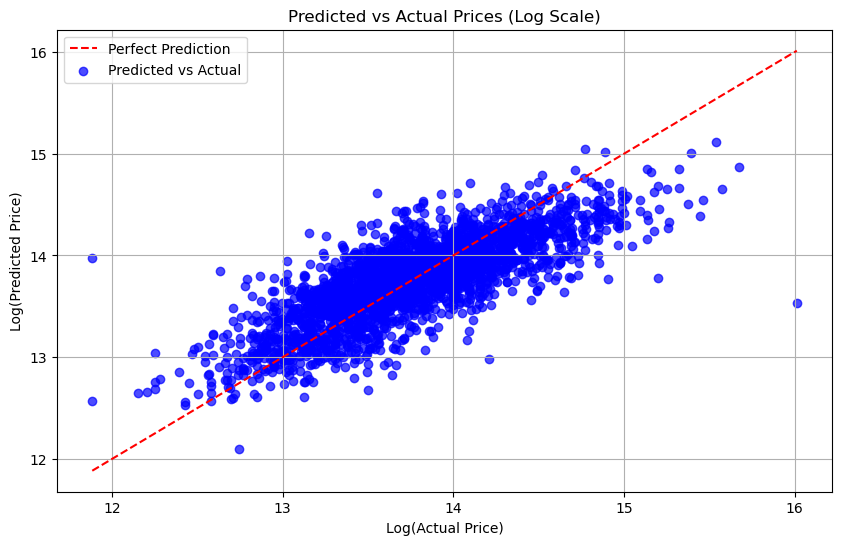

In [335]:
plt.figure(figsize=(10, 6))
max_price = max(max(test_set['log_Price']), max(predictions))
min_price = min(min(test_set['log_Price']), min(predictions)) 
plt.plot([min_price, max_price], [min_price, max_price], color='red', linestyle='--', label='Perfect Prediction')
plt.scatter(test_set['log_Price'], predictions, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.title('Predicted vs Actual Prices (Log Scale)')
plt.xlabel('Log(Actual Price)')
plt.ylabel('Log(Predicted Price)')
plt.legend()
plt.grid()
plt.show()

## 5. Predictive Model using MCMC

In [336]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13131 entries, 0 to 13189
Data columns (total 50 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Suburb                                           13131 non-null  object        
 1   Address                                          13131 non-null  object        
 2   Rooms                                            13131 non-null  float64       
 3   Type                                             13131 non-null  object        
 4   Price                                            13131 non-null  float64       
 5   SellerG                                          13131 non-null  object        
 6   Date                                             13131 non-null  datetime64[ns]
 7   Distance                                         13131 non-null  float64       
 8   Postcode                                 

### Defining target variable and predictors

In [337]:
predictors = ['log_Landsize','log_Distance','log_Propertycount','log_Building_Area', 'time_cont','time_cos','time_sq','log_Bathroom', 'log_Car','log_Bedroom2','HouseAge',
              'RegionGroup_E_Metropolitan','RegionGroup_NSSE_Metropolitan','RegionGroup_WNE_Victoria','Method_PI','Method_SA','Method_SP','Method_VB','Type_t','Type_u',
              'log_Building_Area_RegionGroup_E_Metropolitan','log_Building_Area_RegionGroup_NSSE_Metropolitan','log_Building_Area_RegionGroup_WNE_Victoria']

y=np.log(housing_data['Price'])

### Separating Continuous Predictors from Dummies

In [338]:
continuous_cols = [
    'log_Landsize',
    'log_Distance',
    'log_Propertycount',
    'log_Building_Area',
    'time_cont',
    'time_cos',
    'time_sq',
    'log_Bathroom',
    'log_Car',
    'log_Bedroom2',
    'HouseAge',
    'log_Building_Area_RegionGroup_E_Metropolitan',
    'log_Building_Area_RegionGroup_NSSE_Metropolitan',
    'log_Building_Area_RegionGroup_WNE_Victoria']

dummy_cols = [
    'RegionGroup_E_Metropolitan',
    'RegionGroup_NSSE_Metropolitan',
    'RegionGroup_WNE_Victoria',
    'Method_PI',
    'Method_SA',
    'Method_SP',
    'Method_VB',
    'Type_t',
    'Type_u']


### Split dataset

In [339]:
# For training
X_train_cont = train_set[continuous_cols].values
X_train_dummy = train_set[dummy_cols].values
y_train = np.log(train_set['Price'])

# For testing
X_test_cont = test_set[continuous_cols].values
X_test_dummy = test_set[dummy_cols].values
y_test = np.log(test_set['Price'])

### Standardizing Continuous Predictors

In [340]:
scaler = StandardScaler()
X_train_cont_scaled = scaler.fit_transform(X_train_cont)
X_test_cont_scaled = scaler.transform(X_test_cont)

In [341]:
# Concatenating final train and test sets
X_train_scaled = np.hstack([X_train_cont_scaled, X_train_dummy])
X_test_scaled  = np.hstack([X_test_cont_scaled,  X_test_dummy])


### Adding intercept column

In [342]:
#Adding intercept to column X
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

print("Shape of X_train (with intercept):", X_train_scaled.shape)
print("Shape of X_test (with intercept):", X_test_scaled.shape)

Shape of X_train (with intercept): (10504, 24)
Shape of X_test (with intercept): (2627, 24)


### Defining Likelihood, Prior and Posterior functions

In [343]:
#Predictive model
#Likelihood Function
def log_likelihood(y,X,beta,sigma2):
    n=len(y)
    mu=np.dot(X,beta) #Predicted mean
    residuals=y-mu
    return -0.5*n*np.log(2*np.pi*sigma2)-np.sum(residuals**2)/(2*sigma2)

#Priors
from scipy.stats import norm, invgamma

#Normal Prior for coefficients
def log_prior_beta(beta):
    return np.sum(norm.logpdf(beta,loc=0,scale=20)) #Mean=0, Var=20^2 # Wider prior to allow more variability

#Inverse-Gamma prior for the variance
def log_prior_sigma2(sigma2):
    return invgamma.logpdf(sigma2,a=2,scale=1)

#Posterior
def log_posterior(y, X, beta, sigma2):
    return log_likelihood(y, X, beta, sigma2)+log_prior_beta(beta)+log_prior_sigma2(sigma2)

### Gibbs-Sampling Algorithm

In [344]:
# Gibbs Sampling Algorithm
def gibbs_sampling(y, X, iterations=10000, burn_in=2000):
    n, p = X.shape
    beta_samples = []
    sigma2_samples = []

    # Initialize parameters
    beta = np.zeros(p)
    sigma2 = 1

    # Hyperparameters for priors
    beta_prior_mean = np.zeros(p)
    beta_prior_variance = 10 ** 2  # Var = 20^2, as in the original prior
    alpha = 2  # Shape parameter for the inverse-gamma prior
    beta_scale = 1  # Scale parameter for the inverse-gamma prior

    for i in range(iterations):
        # Sample beta given sigma2
        beta_variance = np.linalg.inv((1 / beta_prior_variance) * np.eye(p) + (1 / sigma2) * np.dot(X.T, X))
        beta_mean = np.dot(beta_variance, np.dot(X.T, y) / sigma2)
        beta = np.random.multivariate_normal(beta_mean, beta_variance)

        # Sample sigma2 given beta
        residuals = y - np.dot(X, beta)
        alpha_post = alpha + n / 2
        beta_post = beta_scale + 0.5 * np.sum(residuals ** 2)
        sigma2 = 1 / np.random.gamma(alpha_post, 1 / beta_post)

        # Store samples
        beta_samples.append(beta)
        sigma2_samples.append(sigma2)

    # Convert lists to arrays
    beta_samples = np.array(beta_samples)
    sigma2_samples = np.array(sigma2_samples)

    # Apply burn-in
    beta_samples = beta_samples[burn_in:]
    sigma2_samples = sigma2_samples[burn_in:]

    return beta_samples, sigma2_samples

### Running the Algorithm

In [345]:
# Run Gibbs Sampling
beta_samples, sigma2_samples = gibbs_sampling(y_train, X_train_scaled, iterations=10000, burn_in=2000)

# Compute posterior means
beta_mean = np.mean(beta_samples, axis=0)
sigma2_mean = np.mean(sigma2_samples)

print("Posterior Mean of coefficients:", beta_mean)
print("Posterior Mean of Variance:", sigma2_mean)

Posterior Mean of coefficients: [ 1.40383799e+01  9.93349483e-02 -2.14880389e-01 -1.15394565e-02
  3.86518903e-02  3.12064809e-02  1.02831769e-02 -3.10618111e-02
  1.07884671e-01  2.51257067e-02  1.14139137e-01  6.01561662e-02
  3.84294560e-02  2.65407020e-01  1.80707461e-02  1.30858298e-01
 -3.19294221e-01 -3.02537905e-01 -7.27267005e-02 -1.69294922e-02
 -6.68178895e-02 -5.59309885e-02 -7.69391739e-02 -2.97186344e-01]
Posterior Mean of Variance: 0.10021789282942108


### Checking convergence of parameters

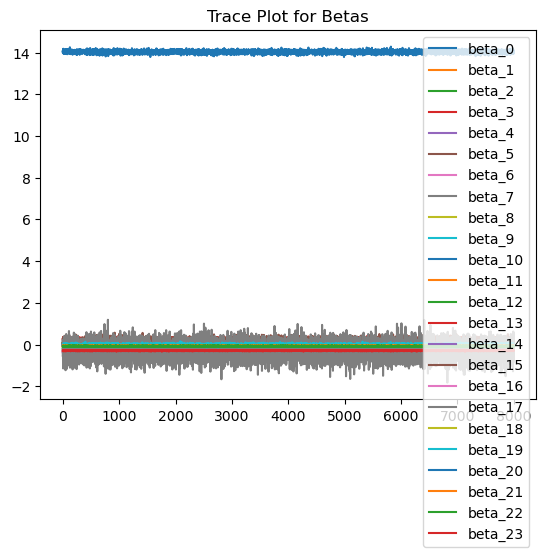

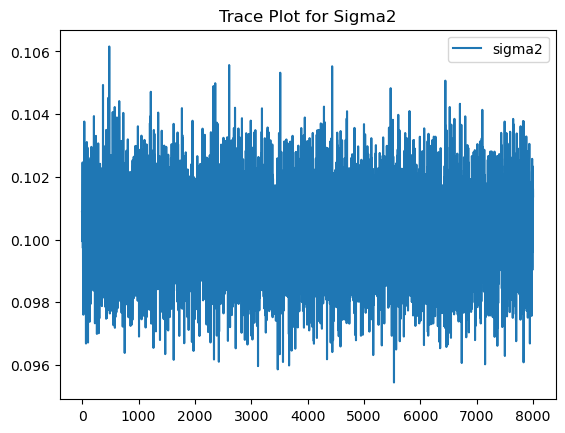

In [346]:
def plot_traces_gibbs(beta_samples, sigma2_samples):
    # Plot beta traces
    for i in range(beta_samples.shape[1]):
        plt.plot(beta_samples[:, i], label=f'beta_{i}')
    plt.title("Trace Plot for Betas")
    plt.legend()
    plt.show()
    
    # Plot sigma2 trace
    plt.plot(sigma2_samples, label="sigma2")
    plt.title("Trace Plot for Sigma2")
    plt.legend()
    plt.show()

# Example usage
plot_traces_gibbs(beta_samples, sigma2_samples)

In [347]:
# Combine the intercept and predictor names
predictor_names = ['Intercept'] + continuous_cols + dummy_cols

# Create a DataFrame with predictors and their corresponding posterior means
beta_df = pd.DataFrame({
    'Predictor': predictor_names,
    'Beta_Mean': beta_mean
})

# Display the DataFrame
beta_df

Predictor  Beta_Mean
0                                         Intercept  14.038380
1                                      log_Landsize   0.099335
2                                      log_Distance  -0.214880
3                                 log_Propertycount  -0.011539
4                                 log_Building_Area   0.038652
5                                         time_cont   0.031206
6                                          time_cos   0.010283
7                                           time_sq  -0.031062
8                                      log_Bathroom   0.107885
9                                           log_Car   0.025126
10                                     log_Bedroom2   0.114139
11                                         HouseAge   0.060156
12     log_Building_Area_RegionGroup_E_Metropolitan   0.038429
13  log_Building_Area_RegionGroup_NSSE_Metropolitan   0.265407
14       log_Building_Area_RegionGroup_WNE_Victoria   0.018071
15                       RegionGroup_E_Metropolitan   0.130858
16                    RegionGroup_NSSE_Metropolitan  -0.319294
17                         RegionGroup_WNE_Victoria  -0.302538
18                                        Method_PI  -0.072727
19                                        Method_SA  -0.016929
20                                        Method_SP  -0.066818
21                                        Method_VB  -0.055931
22                                           Type_t  -0.076939
23                                           Type_u  -0.297186

### Predicting Price

In [348]:
# Predicting price using the mean of posterior samples
y_pred_log = np.dot(X_test_scaled, beta_mean)
y_pred_price = np.exp(y_pred_log)

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(np.exp(y_test), y_pred_price)
mse = mean_squared_error(np.exp(y_test), y_pred_price)
rmse = root_mean_squared_error(np.exp(y_test),y_pred_price)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 282654.2663010569
Mean Squared Error: 213006896503.85834
Root Mean Squared Error: 461526.70183192904


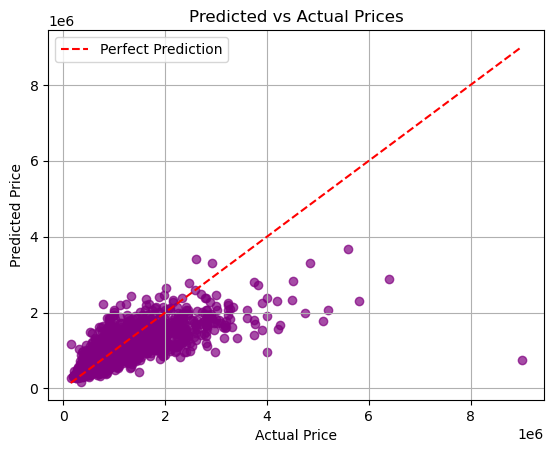

In [349]:
#Scatter plot of Predicted vs. Actual Values
plt.scatter(np.exp(y_test),y_pred_price,alpha=0.7,color='purple')
plt.plot([min(np.exp(y_test)),max(np.exp(y_test))],[min(np.exp(y_test)),max(np.exp(y_test))],color='red',linestyle='--',label='Perfect Prediction')
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid()
plt.show()

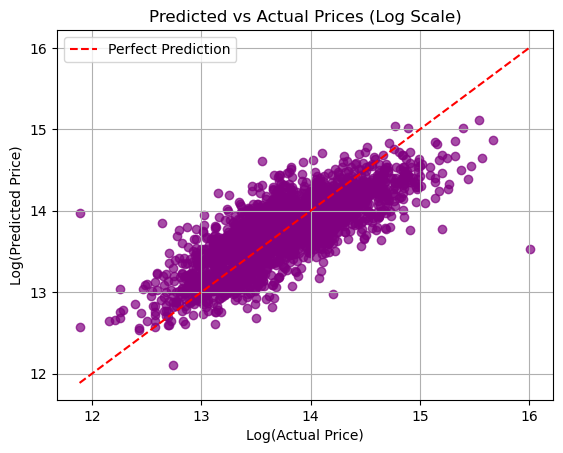

In [350]:
# Scatter plot of log(Predicted) vs. log(Actual) Values
plt.scatter(y_test, y_pred_log, alpha=0.7, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs Actual Prices (Log Scale)')
plt.xlabel('Log(Actual Price)')
plt.ylabel('Log(Predicted Price)')
plt.legend()
plt.grid()
plt.show()